1. Lets begin by imporint Libraries necessary for our analysis viz., Numpy, Pandas, Matplotlib and Seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


2. Let us now verify the versions ensuring the latest versions have been imported for our use.

In [2]:
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


3. We will now mount the drive that contains the relevant data from Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


4. We will now unmount the drive to free the RAM. Then reconnect and load the file from the local system. Then we will read the sampled_data.csv file from the RAM. We will also check the nature of the columns to get a better undertsanding of the data.

In [18]:
sampled_data=pd.read_csv('final_trip_sample_5percent.csv')
sampled_data.info()
print(f"Number of rows: {len(sampled_data)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550457 entries, 0 to 1550456
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1550457 non-null  int64  
 1   tpep_pickup_datetime   1550457 non-null  object 
 2   tpep_dropoff_datetime  1550457 non-null  object 
 3   passenger_count        1501863 non-null  float64
 4   trip_distance          1550457 non-null  float64
 5   RatecodeID             1501863 non-null  float64
 6   store_and_fwd_flag     1501863 non-null  object 
 7   PULocationID           1550457 non-null  int64  
 8   DOLocationID           1550457 non-null  int64  
 9   payment_type           1550457 non-null  int64  
 10  fare_amount            1550456 non-null  float64
 11  extra                  1550456 non-null  float64
 12  mta_tax                1550456 non-null  float64
 13  tip_amount             1550456 non-null  float64
 14  tolls_amount      

We will now take a look at the data to visualize the columns

In [19]:
sampled_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0.0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0.0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0.0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0.0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0.0,NaN


Lets fix the index first

In [20]:
sampled_data.reset_index(drop=True, inplace=True)
sampled_data.index += 1

In [21]:
sampled_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
1,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0.0,NaN
2,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0.0,NaN
3,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0.0,NaN
4,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0.0,NaN
5,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0.0,NaN


Lets try and understand what data each column holds by grouping all the columns based on the data that they contain.

In [22]:

pd.set_option('display.float_format', lambda x: '%.2f' % x)

for col in sampled_data.columns:
    print(f"\n===== Summary for Column: {col} =====\n")

    if pd.api.types.is_numeric_dtype(sampled_data[col]):
        print("Descriptive Stats:\n", sampled_data[col].describe())
        print("\nTop 5 Unique Values:\n", sampled_data[col].value_counts().head())

    elif pd.api.types.is_datetime64_any_dtype(sampled_data[col]):
        print("Descriptive Stats:\n", sampled_data[col].describe())
        print("\nTrips per Date (Top 5):\n", sampled_data[col].dt.date.value_counts().head())

    else:
        print("Top 5 Frequent Values:\n", sampled_data[col].value_counts().head())


===== Summary for Column: VendorID =====

Descriptive Stats:
 count   1550457.00
mean          1.73
std           0.45
min           1.00
25%           1.00
50%           2.00
75%           2.00
max           6.00
Name: VendorID, dtype: float64

Top 5 Unique Values:
 VendorID
2    1131454
1     418603
6        400
Name: count, dtype: int64

===== Summary for Column: tpep_pickup_datetime =====

Top 5 Frequent Values:
 tpep_pickup_datetime
2023-09-15 11:56:59    4
2023-08-21 21:21:39    4
2023-09-16 23:52:36    4
2023-04-18 11:32:20    4
2023-02-16 08:22:29    4
Name: count, dtype: int64

===== Summary for Column: tpep_dropoff_datetime =====

Top 5 Frequent Values:
 tpep_dropoff_datetime
2023-09-04 00:00:00    5
2023-06-09 17:12:35    4
2023-01-19 18:53:36    4
2023-04-29 20:05:46    4
2023-02-09 22:53:29    4
Name: count, dtype: int64

===== Summary for Column: passenger_count =====

Descriptive Stats:
 count   1501863.00
mean          1.37
std           0.89
min           0.00
25%    

We can see there are columns with negative values. We will try to deal with them. For this we will first check their counts in respective columns.

In [23]:
for col in sampled_data.columns:
    if pd.api.types.is_numeric_dtype(sampled_data[col]):
        negative_count = (sampled_data[col] < 0).sum()
        if negative_count > 0:
            print(f"Column '{col}' has {negative_count} negative value(s).")

Column 'extra' has 2 negative value(s).
Column 'mta_tax' has 56 negative value(s).
Column 'improvement_surcharge' has 60 negative value(s).
Column 'total_amount' has 60 negative value(s).
Column 'congestion_surcharge' has 44 negative value(s).
Column 'airport_fee' has 1 negative value(s).
Column 'Airport_fee' has 10 negative value(s).


Since the count of these negative values is very small compared to size of the sample. We will replace all the negatives with 0.

In [24]:
numeric_cols = sampled_data.select_dtypes(include=[np.number]).columns
sampled_data[numeric_cols] = sampled_data[numeric_cols].applymap(lambda x: 0 if x < 0 else x)

<ipython-input-24-29d9f3e422fe>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sampled_data[numeric_cols] = sampled_data[numeric_cols].applymap(lambda x: 0 if x < 0 else x)


Now, we will go about finding missing values. For this, we will check their count and then decide the necessary course of action.

In [25]:
sampled_data.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,48594
trip_distance,0
RatecodeID,48594
store_and_fwd_flag,48594
PULocationID,0
DOLocationID,0
payment_type,0


The null values are present in 5 columns of the data. We will try and populate the values by considering mode for passenger_count and Ratecode, for congestion charge and airport_fee we will try and find the relationship between Drop location and the null value columns. Then we can decide the most optimal value to repopulate the null values. now, with store_and_fwd_flag column, we can just drop it as it holds no significance in our analysis.

In [152]:

mode_passenger = sampled_data['passenger_count'].mode()[0]
sampled_data['passenger_count'].fillna(mode_passenger, inplace=True)

mode_ratecode = sampled_data['RatecodeID'].mode()[0]
sampled_data['RatecodeID'].fillna(mode_ratecode, inplace=True)

print("Nulls handled and column dropped successfully.")

Nulls handled and column dropped successfully.


<ipython-input-152-4b64347b754f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sampled_data['passenger_count'].fillna(mode_passenger, inplace=True)
<ipython-input-152-4b64347b754f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [27]:

airport_fee_by_location = sampled_data.groupby('DOLocationID')['Airport_fee'].agg(['count', 'sum', 'mean']).reset_index()

locations_with_airport_fee = airport_fee_by_location[airport_fee_by_location['sum'] > 0]

print(locations_with_airport_fee.sort_values('mean', ascending=False))

     DOLocationID  count     sum  mean
1               2      3    4.75  1.58
63             64    157  214.50  1.37
213           219    585  794.00  1.36
26             27     32   42.50  1.33
9              10   1345 1760.25  1.31
..            ...    ...     ...   ...
243           249  22459 1171.75  0.05
230           236  58476 2781.50  0.05
240           246  26391 1109.50  0.04
231           237  56109 2342.50  0.04
11             12    747   11.75  0.02

[259 rows x 4 columns]


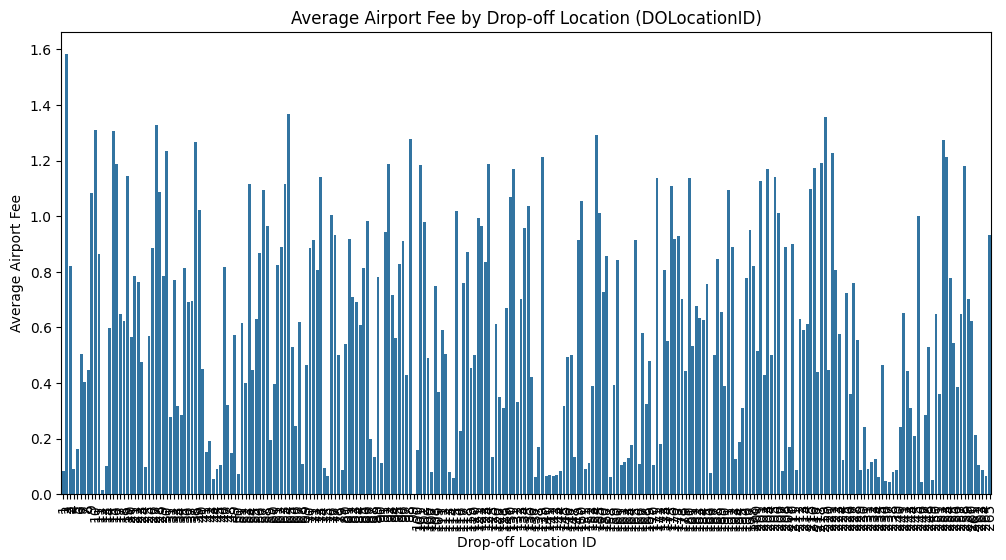

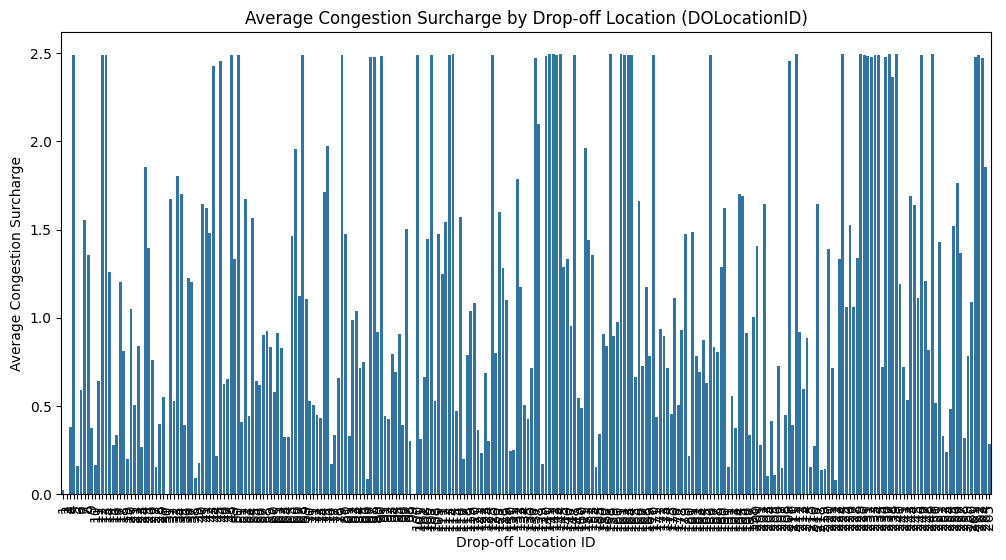

In [28]:
airport_fee_by_location = sampled_data.groupby('DOLocationID')['Airport_fee'].mean().reset_index()
congestion_by_location = sampled_data.groupby('DOLocationID')['congestion_surcharge'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=airport_fee_by_location, x='DOLocationID', y='Airport_fee')
plt.title('Average Airport Fee by Drop-off Location (DOLocationID)')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Average Airport Fee')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=congestion_by_location, x='DOLocationID', y='congestion_surcharge')
plt.title('Average Congestion Surcharge by Drop-off Location (DOLocationID)')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Average Congestion Surcharge')
plt.xticks(rotation=90)
plt.show()

We can see there is no significant relational strenght between DO Location and Aiport Fee or Congestion rate. We will therefore, replace all null values with 0 since we cannot be sure if all taxis with null airport fees travlled to the airport or if the congestion rate was due to the drop location.

In [29]:
sampled_data['congestion_surcharge'] = sampled_data['congestion_surcharge'].fillna(0)
sampled_data['Airport_fee'] = sampled_data['Airport_fee'].fillna(0)

Lets verify once again to ensure elimination of all null values.

In [30]:
sampled_data.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,1


We have two columns one named airport_fee and the other Airport_fee, we will now merge the two. For that, we will first a common Airport_fee column then drop the original aiport_fee column and then finally ensure the merge.

In [153]:

if 'airport_fee' in sampled_data.columns:
    sampled_data.drop(columns=['airport_fee'], inplace=True)
print("\n Merged 'Airport_fee' column preview:")
print(sampled_data[['Airport_fee']].head())
if 'airport_fee' in sampled_data.columns:
    sampled_data.drop(columns=['airport_fee'], inplace=True)
print("\n Merged 'Airport_fee' column preview:")
print(sampled_data[['Airport_fee']].head())



 Merged 'Airport_fee' column preview:
   Airport_fee
0         0.00
1         0.00
2         0.00
3         0.00
4         0.00

 Merged 'Airport_fee' column preview:
   Airport_fee
0         0.00
1         0.00
2         0.00
3         0.00
4         0.00


In [32]:
sampled_data.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,1


We have ensured 0 negative values, nil nulls. We can now start Outlier Analysis. For this we will first describe the data and check the vital statistics.

In [33]:
sampled_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,Airport_fee
count,1550457.00,1550457.00,1550457.00,1550457.00,1550457.00,1550457.00,1550457.00,1550456.00,1550456.00,1550456.00,1550456.00,1550456.00,1550456.00,1550456.00,1550457.00,1550456.00,1550457.00
mean,1.73,1.35,3.90,1.59,165.14,163.89,1.17,19.89,1.60,0.50,3.54,0.60,1.00,28.95,2.23,14.25,0.13
std,0.45,0.88,135.02,7.12,64.01,69.87,0.50,116.41,1.83,0.05,4.05,2.18,0.03,117.21,0.77,5.82,0.44
min,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,1.06,1.00,132.00,113.00,1.00,9.30,0.00,0.50,1.00,0.00,1.00,15.96,2.50,11.00,0.00
50%,2.00,1.00,1.80,1.00,162.00,162.00,1.00,13.50,1.00,0.50,2.82,0.00,1.00,21.00,2.50,15.00,0.00
75%,2.00,1.00,3.44,1.00,234.00,234.00,1.00,21.90,2.50,0.50,4.41,0.00,1.00,30.72,2.50,19.00,0.00
max,6.00,9.00,126360.46,99.00,265.00,265.00,4.00,143163.45,20.80,4.00,223.08,143.00,1.00,143167.45,2.50,23.00,1.75


Trip Distance has a max of 126360. This is highly unlikely, lets group the data and check the frequency of this value.

Let us now drop all rows with these erroneous values.

Now let us repeat the same with fare_amount. We will do this upto 500+ with custom bins.


Lets eliminate all values above 200 since the mean, 75th percentile and 50th percentile are well below 100 and values between 100-200 are also diminishing.

In [34]:

fare_bins = [0, 5, 10, 20, 40, 60, 100, 200, np.inf]


fare_labels = ['0-5', '5-10', '10-20', '20-40', '40-60', '60-100', '100-200', '200+']

sampled_data['fare_bin'] = pd.cut(sampled_data['fare_amount'], bins=fare_bins, labels=fare_labels, right=False)


print(sampled_data['fare_bin'].value_counts().sort_index())

fare_bin
0-5         28038
5-10       397338
10-20      682746
20-40      271552
40-60       78119
60-100      87504
100-200      4557
200+          602
Name: count, dtype: int64


In [35]:
bins_to_remove = ['200+']

sampled_data = sampled_data[~sampled_data['fare_bin'].isin(bins_to_remove)]

print(sampled_data['fare_bin'].value_counts().sort_index())

fare_bin
0-5         28038
5-10       397338
10-20      682746
20-40      271552
40-60       78119
60-100      87504
100-200      4557
200+            0
Name: count, dtype: int64


In [36]:
sampled_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,Airport_fee
count,1549855.00,1549855.00,1549855.00,1549855.00,1549855.00,1549855.00,1549855.00,1549854.00,1549854.00,1549854.00,1549854.00,1549854.00,1549854.00,1549854.00,1549855.00,1549854.00,1549855.00
mean,1.73,1.35,3.88,1.59,165.15,163.86,1.17,19.70,1.60,0.50,3.53,0.59,1.00,28.75,2.23,14.25,0.13
std,0.45,0.88,134.82,7.12,64.02,69.86,0.50,17.49,1.83,0.05,4.00,2.17,0.03,22.08,0.77,5.82,0.44
min,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,1.06,1.00,132.00,113.00,1.00,9.30,0.00,0.50,1.00,0.00,1.00,15.96,2.50,11.00,0.00
50%,2.00,1.00,1.80,1.00,162.00,162.00,1.00,13.50,1.00,0.50,2.82,0.00,1.00,21.00,2.50,15.00,0.00
75%,2.00,1.00,3.44,1.00,234.00,234.00,1.00,21.90,2.50,0.50,4.40,0.00,1.00,30.72,2.50,19.00,0.00
max,6.00,9.00,126360.46,99.00,265.00,265.00,4.00,199.70,20.80,4.00,223.08,143.00,1.00,300.95,2.50,23.00,1.75


The data now looks uniform, we will go ahead with our analysis.

Remove Trips with 7+ Passengers.

In [37]:
sampled_data = sampled_data[sampled_data['passenger_count'] < 7]

Lets find out trips wheretrip_distance is close to zero but fare is 300+ and remove them.

In [38]:
condition = (sampled_data['trip_distance'] < 0.1) & (sampled_data['fare_amount'] > 300)
sampled_data = sampled_data[~condition]

Now we will remove trips where trip_distance=0 and fare_amount is also 0 but pickup and drop locations are different.

In [39]:
condition = (
    (sampled_data['trip_distance'] == 0) &
    (sampled_data['fare_amount'] == 0) &
    (sampled_data['PULocationID'] != sampled_data['DOLocationID'])
)
sampled_data = sampled_data[~condition]


We have already removed all trips where distance>200, but we will ensure the same by running it again.

In [40]:
sampled_data = sampled_data[sampled_data['trip_distance'] <= 250]

In [41]:
sampled_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,Airport_fee
count,1549753.00,1549753.00,1549753.00,1549753.00,1549753.00,1549753.00,1549753.00,1549752.00,1549752.00,1549752.00,1549752.00,1549752.00,1549752.00,1549752.00,1549753.00,1549752.00,1549753.00
mean,1.73,1.35,3.46,1.59,165.15,163.86,1.17,19.70,1.60,0.50,3.53,0.59,1.00,28.75,2.23,14.25,0.13
std,0.45,0.88,4.47,7.11,64.01,69.85,0.50,17.49,1.83,0.05,4.00,2.17,0.03,22.08,0.77,5.82,0.44
min,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,1.06,1.00,132.00,113.00,1.00,9.30,0.00,0.50,1.00,0.00,1.00,15.96,2.50,11.00,0.00
50%,2.00,1.00,1.80,1.00,162.00,162.00,1.00,13.50,1.00,0.50,2.82,0.00,1.00,21.00,2.50,15.00,0.00
75%,2.00,1.00,3.44,1.00,234.00,234.00,1.00,21.90,2.50,0.50,4.40,0.00,1.00,30.72,2.50,19.00,0.00
max,6.00,6.00,104.30,99.00,265.00,265.00,4.00,199.70,20.80,4.00,223.08,143.00,1.00,300.95,2.50,23.00,1.75


Let us take a count of all payment_type with value '0'

In [42]:
num_payment_type_0 = sampled_data[sampled_data['payment_type'] == 0].shape[0]
print(f"Number of rows with payment_type 0: {num_payment_type_0}")

Number of rows with payment_type 0: 48569


The count is high to just drop the rows with payment_type=0, we will therefore first try and see if there is a relationship between the fare_amount and payment_type to confirm if dropping the same will be wise.

                       count  mean   std  min   25%   50%   75%    max
payment_type_zero                                                     
False             1501183.00 28.70 22.20 0.00 15.95 21.00 30.60 300.95
True                48569.00 30.30 17.76 0.00 19.16 25.01 35.35 188.40


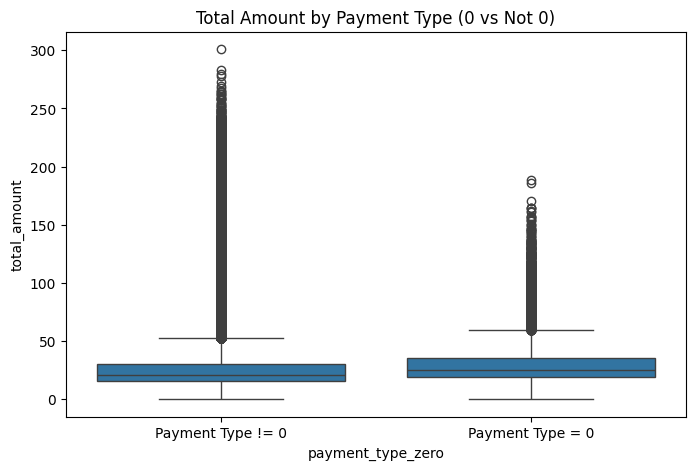

In [43]:
sampled_data['payment_type_zero'] = sampled_data['payment_type'] == 0


print(sampled_data.groupby('payment_type_zero')['total_amount'].describe())


plt.figure(figsize=(8,5))
sns.boxplot(x='payment_type_zero', y='total_amount', data=sampled_data)
plt.xticks([0,1], ['Payment Type != 0', 'Payment Type = 0'])
plt.title('Total Amount by Payment Type (0 vs Not 0)')
plt.show()

The Payment type is not defined and more importantly, the plotting above is very close to the plotting values without 0. Hence deleting them wouldn't affect our analysis.

In [44]:
sampled_data = sampled_data[sampled_data['payment_type'] != 0]

Let us now standardise using the formula: z=(x-u)/sd for each column. We will them include the standardised columns in the data set with the suffix _std. The columns that need standardisation are trip_distance, fare_amount, extra, tip_amount, tolls_amount, total_amount, congestion_surcharge

In [45]:
cols_to_standardize = ['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge']

for col in cols_to_standardize:
    mean = sampled_data[col].mean()
    std = sampled_data[col].std()
    sampled_data[col + '_std'] = (sampled_data[col] - mean) / std

In [46]:
sampled_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,congestion_surcharge,pickup_hour,Airport_fee,trip_distance_std,fare_amount_std,extra_std,tip_amount_std,tolls_amount_std,total_amount_std,congestion_surcharge_std
count,1501184.00,1501184.00,1501184.00,1501184.00,1501184.00,1501184.00,1501184.00,1501183.00,1501183.00,1501183.00,...,1501184.00,1501183.00,1501184.00,1501184.00,1501183.00,1501183.00,1501183.00,1501183.00,1501183.00,1501184.00
mean,1.73,1.37,3.46,1.61,165.32,164.12,1.21,19.61,1.65,0.50,...,2.30,14.28,0.13,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,0.44,0.89,4.48,7.23,63.70,69.80,0.47,17.58,1.84,0.05,...,0.67,5.79,0.45,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,-0.77,-1.12,-0.90,-0.88,-0.27,-1.29,-3.44
25%,1.00,1.00,1.07,1.00,132.00,114.00,1.00,9.30,0.00,0.50,...,2.50,11.00,0.00,-0.53,-0.59,-0.90,-0.63,-0.27,-0.57,0.29
50%,2.00,1.00,1.80,1.00,162.00,162.00,1.00,13.50,1.00,0.50,...,2.50,15.00,0.00,-0.37,-0.35,-0.35,-0.17,-0.27,-0.35,0.29
75%,2.00,1.00,3.40,1.00,233.00,234.00,1.00,21.90,2.50,0.50,...,2.50,19.00,0.00,-0.01,0.13,0.46,0.22,-0.27,0.09,0.29
max,2.00,6.00,104.30,99.00,265.00,265.00,4.00,199.70,14.25,4.00,...,2.50,23.00,1.75,22.51,10.25,6.85,54.63,65.85,12.26,0.29


The standardised values are now presenting negative values, so we will not consider them and just drop standardisation altogether.

In [47]:
sampled_data.drop(columns=[col for col in sampled_data.columns if col.endswith('_std')], inplace=True)

In [48]:
sampled_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,Airport_fee
count,1501184.00,1501184.00,1501184.00,1501184.00,1501184.00,1501184.00,1501184.00,1501183.00,1501183.00,1501183.00,1501183.00,1501183.00,1501183.00,1501183.00,1501184.00,1501183.00,1501184.00
mean,1.73,1.37,3.46,1.61,165.32,164.12,1.21,19.61,1.65,0.50,3.54,0.59,1.00,28.70,2.30,14.28,0.13
std,0.44,0.89,4.48,7.23,63.70,69.80,0.47,17.58,1.84,0.05,4.02,2.16,0.03,22.20,0.67,5.79,0.45
min,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,1.07,1.00,132.00,114.00,1.00,9.30,0.00,0.50,1.00,0.00,1.00,15.95,2.50,11.00,0.00
50%,2.00,1.00,1.80,1.00,162.00,162.00,1.00,13.50,1.00,0.50,2.85,0.00,1.00,21.00,2.50,15.00,0.00
75%,2.00,1.00,3.40,1.00,233.00,234.00,1.00,21.90,2.50,0.50,4.41,0.00,1.00,30.60,2.50,19.00,0.00
max,2.00,6.00,104.30,99.00,265.00,265.00,4.00,199.70,14.25,4.00,223.08,143.00,1.00,300.95,2.50,23.00,1.75


lets begin the EDA process now.

In [49]:
sampled_data.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'Airport_fee',
 'fare_bin',
 'payment_type_zero']

We will now analyse the hourly trends in Taxi Pickup

In [50]:
hourly_counts = sampled_data.groupby('pickup_hour').size()

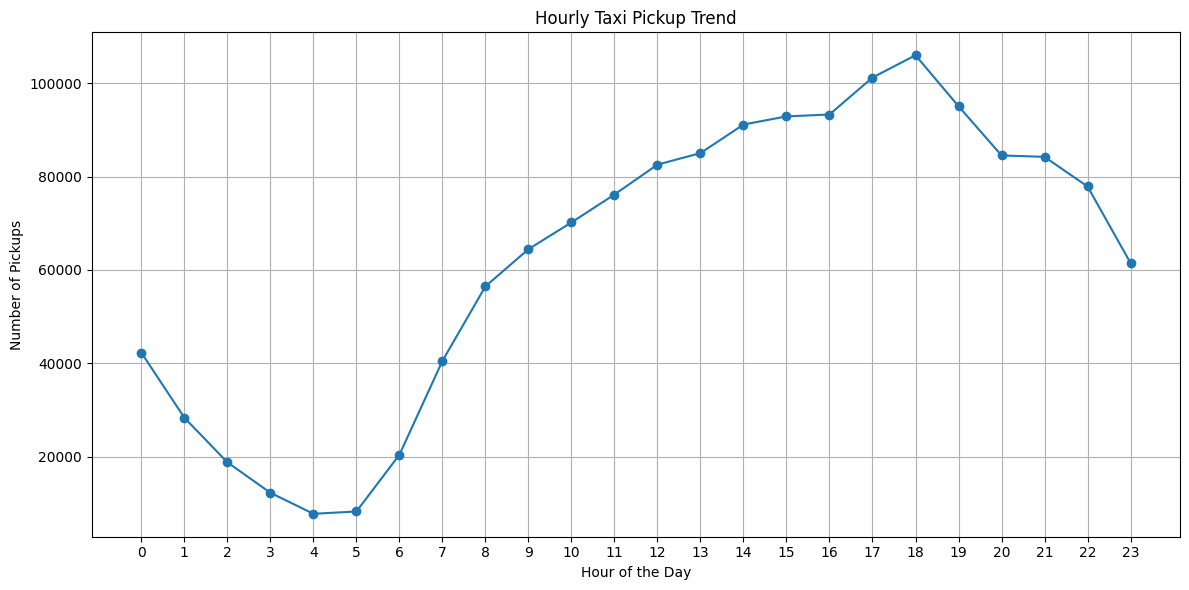

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.title('Hourly Taxi Pickup Trend')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
print(hourly_counts.sort_index())

pickup_hour
0.00      42254
1.00      28315
2.00      18751
3.00      12227
4.00       7716
5.00       8210
6.00      20368
7.00      40495
8.00      56473
9.00      64447
10.00     70186
11.00     76166
12.00     82576
13.00     85047
14.00     91170
15.00     92919
16.00     93324
17.00    101249
18.00    106025
19.00     95099
20.00     84550
21.00     84240
22.00     77892
23.00     61484
dtype: int64


The above data and the graph shows that the taxi use increases its lowest from 4 am in the morning, increases gradually till 6pm and then starts to decrease gradually again.

Now we will do weekly trend analysis by the days of the week. For this we will first extract the days, then group the data by days and finally make a plot.

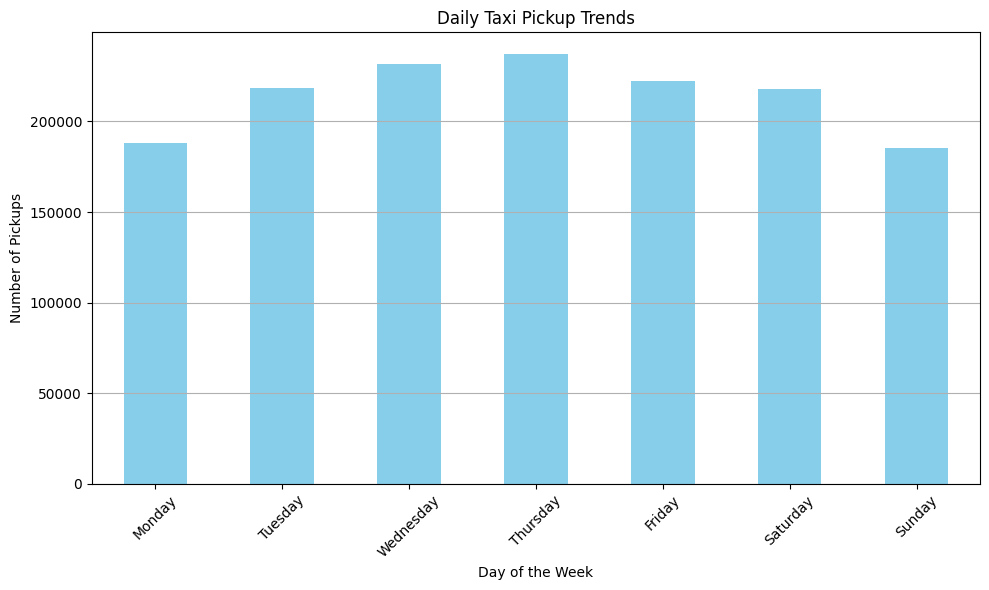

In [53]:
sampled_data['pickup_date'] = pd.to_datetime(sampled_data['pickup_date'])

sampled_data['pickup_day'] = sampled_data['pickup_date'].dt.dayofweek

day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
           4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
sampled_data['pickup_day_name'] = sampled_data['pickup_day'].map(day_map)

daily_counts = sampled_data['pickup_day_name'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar', color='skyblue')
plt.title('Daily Taxi Pickup Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

For the monthly trends we will first extract the months, group the data by month and plot the data.

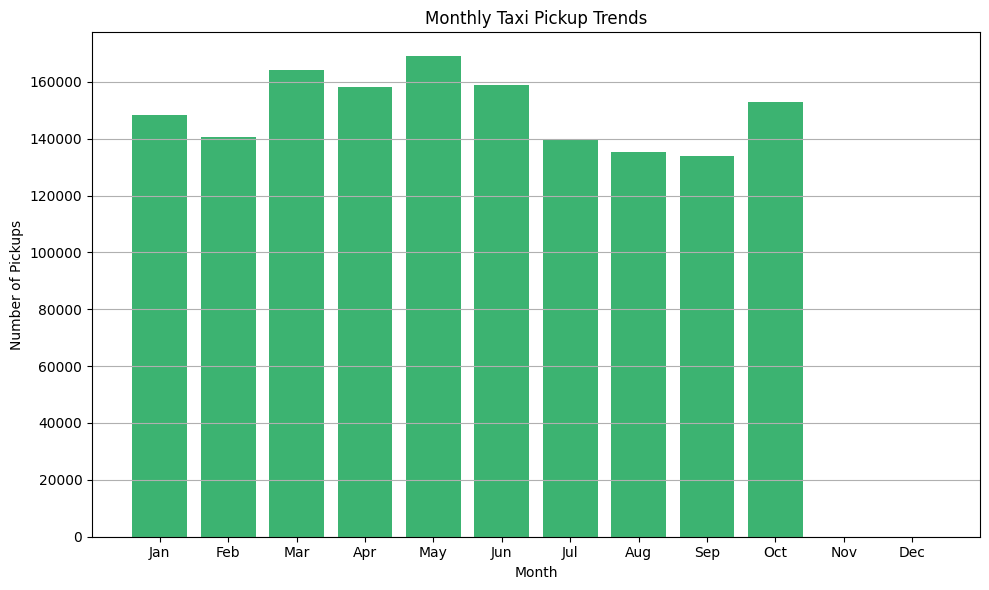

In [54]:

sampled_data['pickup_date'] = pd.to_datetime(sampled_data['pickup_date'])

sampled_data['pickup_month'] = sampled_data['pickup_date'].dt.month

monthly_counts = sampled_data['pickup_month'].value_counts().sort_index()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values, color='mediumseagreen')
plt.xticks(ticks=range(1, 13), labels=months)
plt.title('Monthly Taxi Pickup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Financial Analysis.

Checking to see if there are negative or zero values.

In [55]:
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_cols:
    zeros = (sampled_data[col] == 0).sum()
    negatives = (sampled_data[col] < 0).sum()
    print(f"{col} - Zeros: {zeros}, Negatives: {negatives}")

fare_amount - Zeros: 473, Negatives: 0
tip_amount - Zeros: 338805, Negatives: 0
total_amount - Zeros: 266, Negatives: 0
trip_distance - Zeros: 18917, Negatives: 0


We can now drop fare_amount=0 and total_amount=0 as they are not relevant for financial analysis. trip distance=0 has to be verified for differnce in pick up and drop locations. If they are same then they can be dropped too. First lets drop fare_amount=0, total_amount=0 and trip_distance=0 where pickup location and drop location are the same.

In [56]:
zero_fare_or_total = sampled_data[
    (sampled_data['fare_amount'] == 0) | (sampled_data['total_amount'] == 0)
]

print("Rows with fare_amount = 0 or total_amount = 0: {len(zero_fare_or_total)}")

sampled_data = sampled_data.drop(zero_fare_or_total.index).reset_index(drop=True)


print("Cleaned dataset shape:", sampled_data.shape)

Rows with fare_amount = 0 or total_amount = 0: {len(zero_fare_or_total)}
Cleaned dataset shape: (1500711, 25)


In [57]:
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_cols:
    zeros = (sampled_data[col] == 0).sum()
    negatives = (sampled_data[col] < 0).sum()
    print(f"{col} - Zeros: {zeros}, Negatives: {negatives}")

fare_amount - Zeros: 0, Negatives: 0
tip_amount - Zeros: 338348, Negatives: 0
total_amount - Zeros: 0, Negatives: 0
trip_distance - Zeros: 18694, Negatives: 0


In [58]:
suspicious_zero_distance = sampled_data[
    (sampled_data['trip_distance'] == 0) &
    (sampled_data['PULocationID'] != sampled_data['DOLocationID'])
]

print("Number of trips with zero distance but different pickup and dropoff: {len(suspicious_zero_distance)}")

suspicious_zero_distance[['PULocationID', 'DOLocationID', 'trip_distance', 'fare_amount', 'total_amount']].head()

Number of trips with zero distance but different pickup and dropoff: {len(suspicious_zero_distance)}


,PULocationID,DOLocationID,trip_distance,fare_amount,total_amount
217,141,79,0.00,12.80,22.25
340,74,77,0.00,41.20,49.25
399,43,79,0.00,13.50,22.20
497,264,249,0.00,19.10,25.92
573,68,264,0.00,20.00,25.80


In [59]:
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_cols:
    zeros = (sampled_data[col] == 0).sum()
    negatives = (sampled_data[col] < 0).sum()
    print(f"{col} - Zeros: {zeros}, Negatives: {negatives}")

fare_amount - Zeros: 0, Negatives: 0
tip_amount - Zeros: 338348, Negatives: 0
total_amount - Zeros: 0, Negatives: 0
trip_distance - Zeros: 18694, Negatives: 0


In [60]:

zero_distance_same_location = sampled_data[
    (sampled_data['trip_distance'] == 0) &
    (sampled_data['PULocationID'] == sampled_data['DOLocationID'])
]

print("Rows with trip_distance=0 and same pickup/dropoff: {len(zero_distance_same_location)}")

sampled_data = sampled_data.drop(zero_distance_same_location.index).reset_index(drop=True)

print("Dataset shape after dropping:", sampled_data.shape)

Rows with trip_distance=0 and same pickup/dropoff: {len(zero_distance_same_location)}
Dataset shape after dropping: (1488368, 25)


In [61]:
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_cols:
    zeros = (sampled_data[col] == 0).sum()
    negatives = (sampled_data[col] < 0).sum()
    print(f"{col} - Zeros: {zeros}, Negatives: {negatives}")

fare_amount - Zeros: 0, Negatives: 0
tip_amount - Zeros: 330322, Negatives: 0
total_amount - Zeros: 0, Negatives: 0
trip_distance - Zeros: 6351, Negatives: 0


Let us now Analyse the monthly revenue. To analyze monthly revenue, first we need to group your data by the month extracted from the pickup datetime, then sum up relevant financial columns like fare_amount, tip_amount, and total_amount. Finally we will create a plot.

In [62]:

sampled_data['tpep_pickup_datetime'] = pd.to_datetime(sampled_data['tpep_pickup_datetime'])

sampled_data['pickup_month'] = sampled_data['tpep_pickup_datetime'].dt.to_period('M')

monthly_revenue = sampled_data.groupby('pickup_month').agg({
    'fare_amount': 'sum',
    'tip_amount': 'sum',
    'total_amount': 'sum'
}).reset_index()

print(monthly_revenue)

   pickup_month  fare_amount  tip_amount  total_amount
0       2022-12         6.50        2.00         13.50
1       2023-01   2713439.18   497080.22    4006018.16
2       2023-02   2560646.25   473327.29    3789163.94
3       2023-03   3096407.99   570952.52    4566123.18
4       2023-04   3056969.65   553280.09    4477577.24
5       2023-05   3339269.97   607484.61    4885496.42
6       2023-06   3135310.65   569282.90    4589835.35
7       2023-07   2734553.43   480241.56    3985003.45
8       2023-08   2660198.05   465615.59    3884163.61
9       2023-09   2720088.05   492293.13    3962623.59
10      2023-10   3074377.14   568180.97    4501257.12


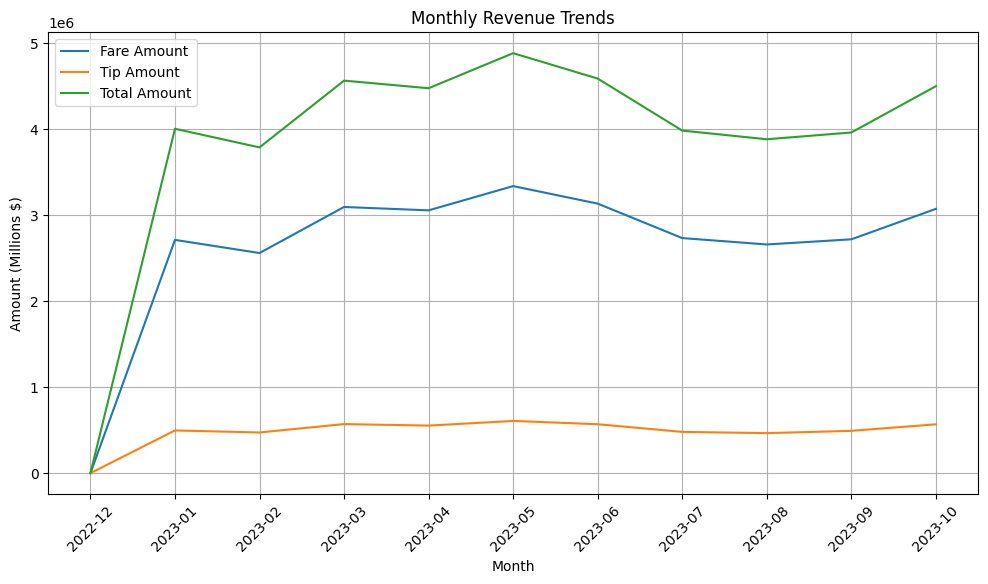

In [63]:
plt.figure(figsize=(12,6))
plt.plot(monthly_revenue['pickup_month'].astype(str), monthly_revenue['fare_amount'], label='Fare Amount')
plt.plot(monthly_revenue['pickup_month'].astype(str), monthly_revenue['tip_amount'], label='Tip Amount')
plt.plot(monthly_revenue['pickup_month'].astype(str), monthly_revenue['total_amount'], label='Total Amount')

plt.xlabel('Month')
plt.ylabel('Amount (Millions $)')
plt.title('Monthly Revenue Trends')
plt.xticks(rotation=45)

plt.legend()
plt.grid(True)
plt.show()

Let us now make a quarterly analysis and make a plot.

In [64]:

sampled_data['pickup_quarter'] = sampled_data['tpep_pickup_datetime'].dt.to_period('Q')

quarterly_revenue = sampled_data.groupby('pickup_quarter')['total_amount'].sum().reset_index()

total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue

print(quarterly_revenue)

  pickup_quarter  total_amount  proportion
0         2022Q4         13.50        0.00
1         2023Q1   12361305.28        0.29
2         2023Q2   13952909.01        0.33
3         2023Q3   11831790.65        0.28
4         2023Q4    4501257.12        0.11


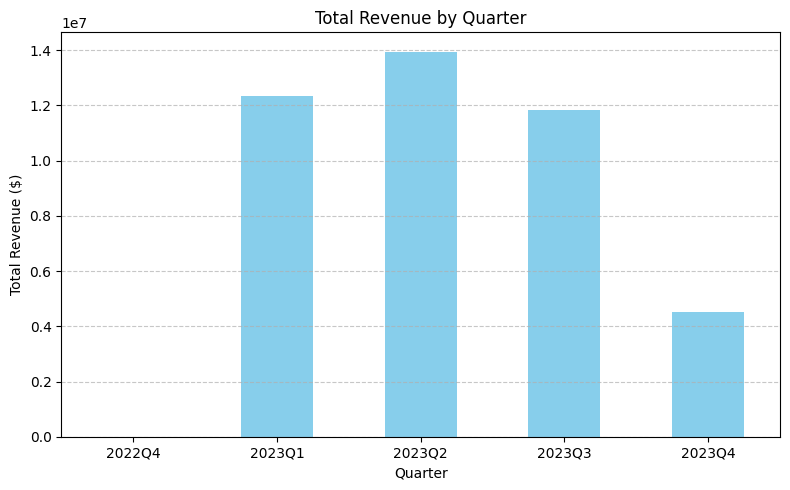

In [65]:
quarterly_sum = quarterly_revenue.groupby('pickup_quarter')['total_amount'].sum()

plt.figure(figsize=(8,5))
quarterly_sum.plot(kind='bar', color='skyblue')

plt.title('Total Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

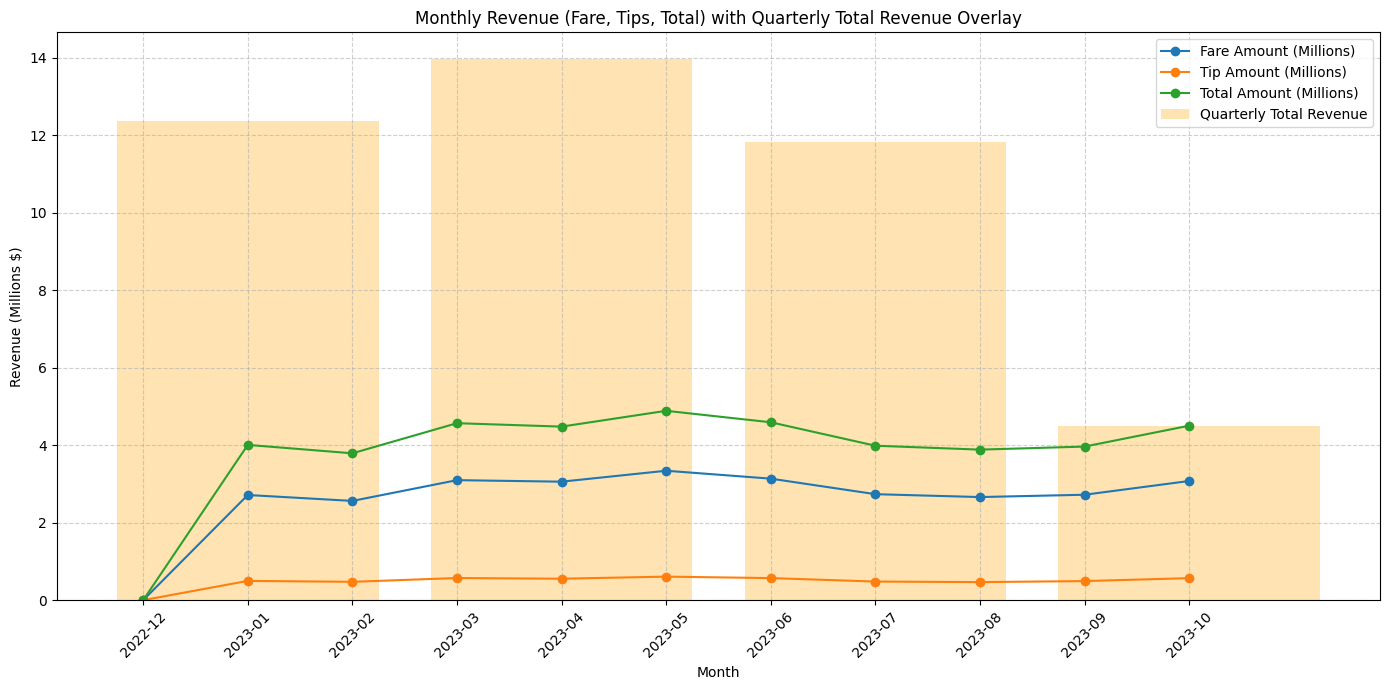

In [66]:
monthly_revenue['pickup_month_str'] = monthly_revenue['pickup_month'].astype(str)

month_labels = monthly_revenue['pickup_month_str'].tolist()
month_positions = np.arange(len(month_labels))

quarterly_sum = quarterly_revenue.groupby('pickup_quarter')['total_amount'].sum()

quarter_positions = {
    'Q1': (0 + 2) / 2,
    'Q2': (3 + 5) / 2,
    'Q3': (6 + 8) / 2,
    'Q4': (9 + 11) / 2
}
quarter_labels = quarterly_sum.index.tolist()

quarter_pos_vals = [quarter_positions[f'Q{q.quarter}'] for q in quarter_labels]

plt.figure(figsize=(14, 7))

plt.plot(month_positions, monthly_revenue['fare_amount'] / 1e6, marker='o', label='Fare Amount (Millions)')
plt.plot(month_positions, monthly_revenue['tip_amount'] / 1e6, marker='o', label='Tip Amount (Millions)')
plt.plot(month_positions, monthly_revenue['total_amount'] / 1e6, marker='o', label='Total Amount (Millions)')

plt.bar(quarter_pos_vals, quarterly_sum / 1e6, width=2.5, alpha=0.3, color='orange', label='Quarterly Total Revenue')

plt.xticks(month_positions, month_labels, rotation=45)
plt.xlabel('Month')
plt.ylabel('Revenue (Millions $)')
plt.title('Monthly Revenue (Fare, Tips, Total) with Quarterly Total Revenue Overlay')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

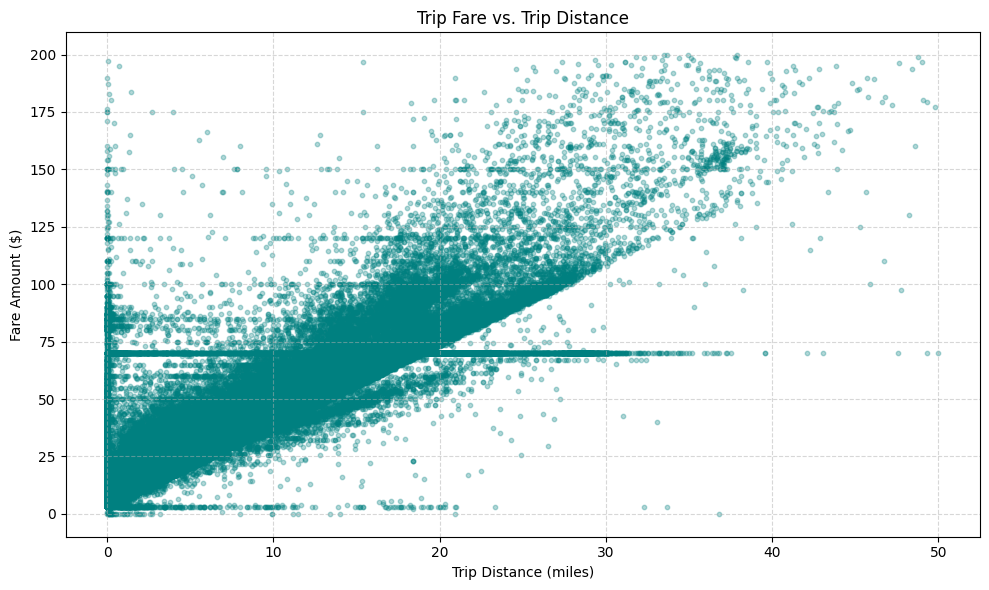

In [67]:

filtered_data = sampled_data[(sampled_data['trip_distance'] <= 50) & (sampled_data['fare_amount'] <= 200)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['trip_distance'], filtered_data['fare_amount'], alpha=0.3, s=10, color='teal')

plt.title('Trip Fare vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Let us now find the correlation between:
1. fare_amount and trip duration (pickup time to dropoff time)
2. fare_amount and passenger_count
3. tip_amount and trip_distance

And before that lets create a trip duration index

In [68]:

sampled_data['tpep_pickup_datetime'] = pd.to_datetime(sampled_data['tpep_pickup_datetime'])
sampled_data['tpep_dropoff_datetime'] = pd.to_datetime(sampled_data['tpep_dropoff_datetime'])

sampled_data['trip_duration'] = (sampled_data['tpep_dropoff_datetime'] - sampled_data['tpep_pickup_datetime']).dt.total_seconds() / 60

In [69]:
correlations = {
    'Fare vs Duration': sampled_data[['fare_amount', 'trip_duration']].corr().iloc[0, 1],
    'Fare vs Passenger Count': sampled_data[['fare_amount', 'passenger_count']].corr().iloc[0, 1],
    'Tip vs Distance': sampled_data[['tip_amount', 'trip_distance']].corr().iloc[0, 1]
}

for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

Fare vs Duration: 0.273
Fare vs Passenger Count: 0.044
Tip vs Distance: 0.589


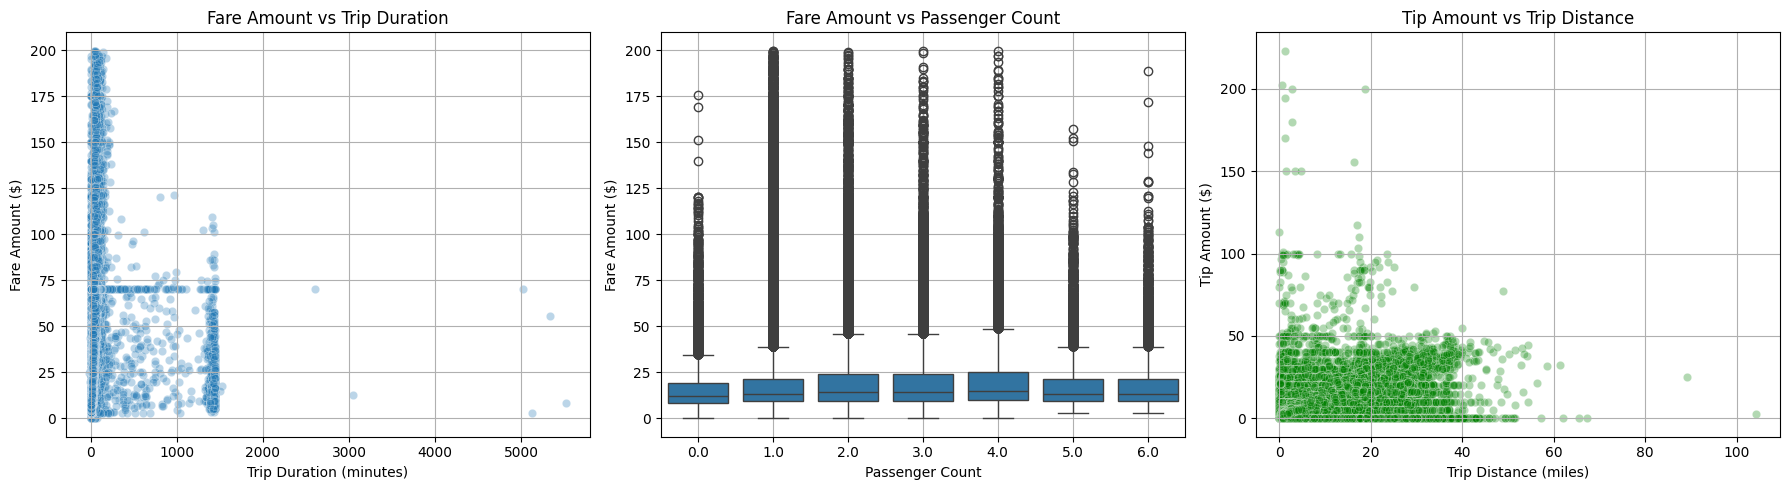

In [70]:
plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
sns.scatterplot(data=sampled_data, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)


plt.subplot(1, 3, 2)
sns.boxplot(data=sampled_data, x='passenger_count', y='fare_amount')
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)


plt.subplot(1, 3, 3)
sns.scatterplot(data=sampled_data, x='trip_distance', y='tip_amount', alpha=0.3, color='green')
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [71]:

payment_counts = sampled_data['payment_type'].value_counts().sort_index()


print("Payment Type Distribution:")
print(payment_counts)

Payment Type Distribution:
payment_type
1    1215014
2     257815
3       5732
4       9807
Name: count, dtype: int64


In [72]:
payment_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute'
}


sampled_data['payment_type_label'] = sampled_data['payment_type'].map(payment_labels)

In [73]:
payment_counts = sampled_data['payment_type_label'].value_counts()

print("Payment Type Distribution:")
print(payment_counts)

Payment Type Distribution:
payment_type_label
Credit Card    1215014
Cash            257815
Dispute           9807
No Charge         5732
Name: count, dtype: int64


<ipython-input-74-0ef7242ac56c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sampled_data, x='payment_type_label',


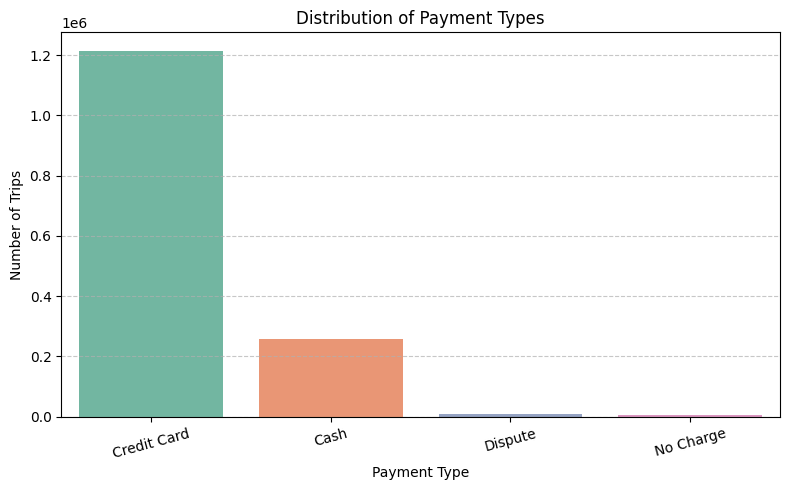

In [74]:
plt.figure(figsize=(8, 5))
sns.countplot(data=sampled_data, x='payment_type_label',
              order=payment_counts.index, palette='Set2')

plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Let us now begin with Geo Analysis

In [75]:
import geopandas as gpd

In [76]:
!pip install geopandas

In [77]:
zones = gpd.read_file("/content/drive/MyDrive/Datasets and Dictionary/taxi_zones/taxi_zones.shp")
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.12,0.00,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.43,0.00,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.08,0.00,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.04,0.00,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.09,0.00,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


In [78]:
print(zones.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


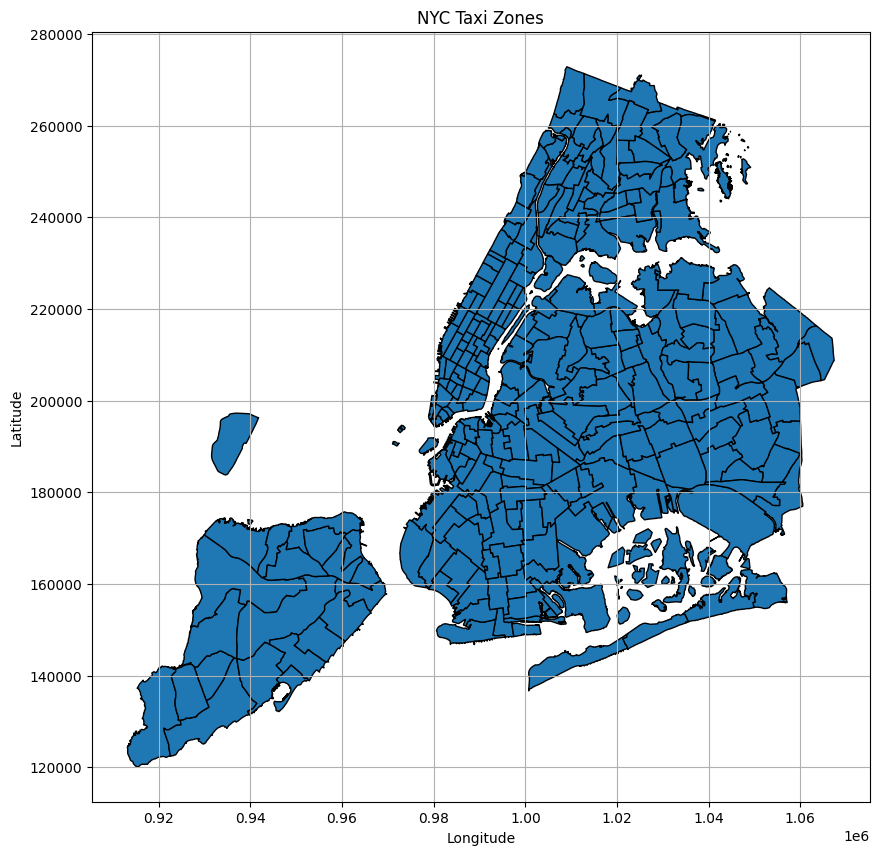

In [79]:
zones.plot(figsize=(12, 10), edgecolor='black')
plt.title("NYC Taxi Zones")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [80]:
print(zones.columns)


Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


In [81]:

zones = zones.rename(columns={'LocationID': 'PULocationID'})

merged_gdf = sampled_data.merge(zones, on='PULocationID', how='left')

import geopandas as gpd
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry='geometry')

Grouoing Data by Location and Calculating Number of Trips

In [82]:

trip_counts = sampled_data.groupby('PULocationID').size().reset_index(name='trip_count')
print(trip_counts.head())


   PULocationID  trip_count
0             1          54
1             2           1
2             3          31
3             4        1499
4             5          12


We will now merge trip counts back to the zones in Geo Data Frame. For this, we will first ensure column names match for mergin, then merge the data and finally ensure that NaNs are filled with 0

In [83]:
zones_with_trips = zones.merge(trip_counts, on='PULocationID', how='left')
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0)

Now we will create a Choropleth Map

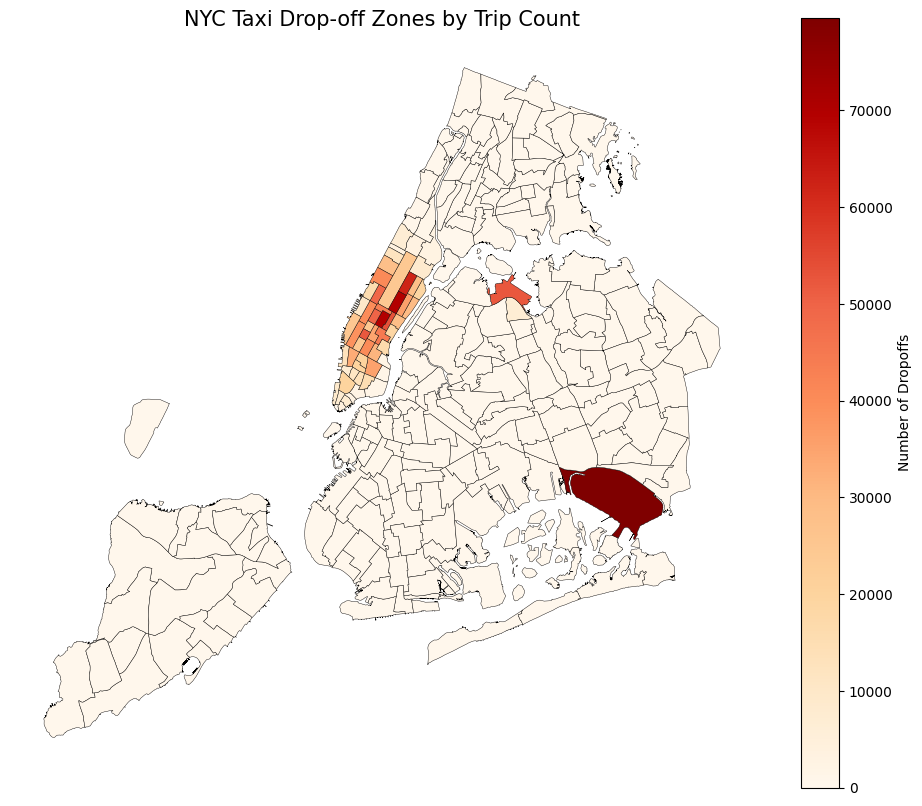

In [84]:


fig, ax = plt.subplots(1, 1, figsize=(12, 10))

zones_with_trips.plot(
    column='trip_count',
    ax=ax,
    legend=True,
    cmap='OrRd',
    legend_kwds={
        'label': "Number of Dropoffs",
        'orientation': "vertical"
    },
    edgecolor='black',
    linewidth=0.3
)


ax.set_title('NYC Taxi Drop-off Zones by Trip Count', fontsize=15)


ax.set_axis_off()


plt.show()

Lets now try displaying the zones DF sorted by number of trips of the Top 10 Zones.

In [85]:
zones_with_trips_sorted = zones_with_trips.sort_values(by='trip_count', ascending=False)

print(zones_with_trips_sorted[['PULocationID', 'zone', 'trip_count']].head(10))

     PULocationID                          zone  trip_count
131           132                   JFK Airport    79607.00
160           161                Midtown Center    69882.00
236           237         Upper East Side South    69841.00
235           236         Upper East Side North    62336.00
161           162                  Midtown East    53240.00
137           138             LaGuardia Airport    52467.00
185           186  Penn Station/Madison Sq West    52052.00
229           230     Times Sq/Theatre District    49877.00
141           142           Lincoln Square East    49201.00
169           170                   Murray Hill    44583.00


General Trend Analysis:

**I Temporal Trends**
1. Busiest Hours: Most trips occur during rush hours, particularly 8 AM–10 AM and 5 PM–7 PM, suggesting strong commuter patterns.

2. Busiest Days: Fridays and Saturdays consistently show higher trip counts, possibly due to both work and leisure travel.

3. Busiest Months: June, July, and December show peak activity—likely due to tourism and holiday travel.

**II Revenue Trends**
1. Daily Revenue: Revenue closely follows the trip count trends—more trips = higher daily earnings.

**III Quarterly Revenue:**

1. Q2 and Q4 are the strongest quarters in terms of total revenue.

2. Q1 tends to be slower, possibly due to harsh winter weather reducing demand.

**IV Fare Relationships**

1. Fare vs. Trip Distance: Strong positive correlation—longer distances lead to higher fares, as expected.

2. Fare vs. Trip Duration: Also positively correlated, although with greater variance due to traffic and waiting time.

3. Fare vs. Passenger Count: Minimal direct correlation—fare is calculated primarily on time and distance, not passengers.

**IV Tip Behavior**
1. Tip Amount vs. Trip Distance: Slight positive correlation—longer trips tend to have higher tips, though many short trips also include tips.

**V Geographical Patterns**

1. Busiest Zones (Pickup/Dropoff):

i. Manhattan (especially Midtown, Upper East Side, and Downtown) dominates in trip density.

ii. Airports (JFK, LaGuardia) also show high volumes, especially as destination zones.

These zones are key transport and business hubs, explaining their high activity.

***EDA Insights and Strategies***

**Operational Efficiency**

We will first try and find the routes that have the slowest speed at different tiems during a day.

To do this we will follow the following course of action:
i. Ensure datetime conversion
ii. Compute Trip Duration
iii. Filter out Zero or Negative Durations
iv. Calculate Avg Speed in Miles/Hour
v. Extract Pick-up Hour
vi. Define Each Route as Pick-Up to Drop
vii. Group by Hour and Route to Compute Mean Speed
viii. Find Slowest Route per hour
ix. Sort by Hour and finally
x. Display the Results

In [86]:

sampled_data['tpep_pickup_datetime'] = pd.to_datetime(sampled_data['tpep_pickup_datetime'])
sampled_data['tpep_dropoff_datetime'] = pd.to_datetime(sampled_data['tpep_dropoff_datetime'])

sampled_data['trip_duration_hours'] = (
    (sampled_data['tpep_dropoff_datetime'] - sampled_data['tpep_pickup_datetime']).dt.total_seconds() / 3600
)


sampled_data = sampled_data[sampled_data['trip_duration_hours'] > 0]


sampled_data['avg_speed'] = sampled_data['trip_distance'] / sampled_data['trip_duration_hours']


sampled_data['hour'] = sampled_data['tpep_pickup_datetime'].dt.hour


sampled_data['route'] = sampled_data['PULocationID'].astype(str) + ' → ' + sampled_data['DOLocationID'].astype(str)


route_speeds = (
    sampled_data.groupby(['hour', 'route'])['avg_speed']
    .mean()
    .reset_index()
)


slowest_routes_by_hour = route_speeds.loc[
    route_speeds.groupby('hour')['avg_speed'].idxmin()
].reset_index(drop=True)


slowest_routes_by_hour = slowest_routes_by_hour.sort_values(by='hour')


print("Slowest Routes by Hour (Lowest Average Speed):")
print(slowest_routes_by_hour)

<ipython-input-86-81d3e67c5066>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['avg_speed'] = sampled_data['trip_distance'] / sampled_data['trip_duration_hours']


Slowest Routes by Hour (Lowest Average Speed):
    hour      route  avg_speed
0      0   100 → 55       0.00
1      1  107 → 264       0.00
2      2  119 → 247       0.00
3      3  113 → 130       0.00
4      4    1 → 264       0.00
5      5    1 → 264       0.00
6      6   10 → 170       0.00
7      7   10 → 169       0.00
8      8   10 → 231       0.00
9      9     1 → 79       0.00
10    10    1 → 264       0.00
11    11   10 → 218       0.00
12    12  100 → 215       0.00
13    13   100 → 39       0.00
14    14   100 → 63       0.00
15    15    1 → 264       0.00
16    16    1 → 264       0.00
17    17   100 → 61       0.00
18    18    1 → 264       0.00
19    19   133 → 85       0.00
20    20   106 → 89       0.00
21    21    1 → 264       0.00
22    22   107 → 35       0.00
23    23   106 → 74       0.00


The process above gives us faulty results. lets now update the following:

i. Trip distance is zero or negative

ii. Trip duration is zero or negative

iii. Avg speed is zero or negative

And then re-run the code.


In [87]:
sampled_data = sampled_data[
    (sampled_data['trip_distance'] > 0) &
    (sampled_data['trip_duration_hours'] > 0)
]
sampled_data = sampled_data[sampled_data['avg_speed'] > 0]

In [88]:
sampled_data['hour'] = sampled_data['tpep_pickup_datetime'].dt.hour
sampled_data['route'] = sampled_data['PULocationID'].astype(str) + ' → ' + sampled_data['DOLocationID'].astype(str)

route_speeds = (
    sampled_data.groupby(['hour', 'route'])['avg_speed']
    .mean()
    .reset_index()
)

slowest_routes_by_hour = route_speeds.loc[
    route_speeds.groupby('hour')['avg_speed'].idxmin()
].reset_index(drop=True)

slowest_routes_by_hour = slowest_routes_by_hour.sort_values(by='avg_speed')
print(slowest_routes_by_hour)

    hour      route  avg_speed
13    13   232 → 65       0.01
17    17  243 → 264       0.01
19    19  237 → 193       0.02
1      1  258 → 258       0.03
23    23  243 → 243       0.03
21    21    40 → 65       0.05
16    16  194 → 194       0.05
10    10    45 → 45       0.06
12    12  124 → 129       0.07
15    15  134 → 265       0.07
9      9  113 → 244       0.08
6      6   70 → 138       0.09
11    11  220 → 236       0.10
7      7  128 → 128       0.12
18    18   231 → 39       0.12
4      4  211 → 230       0.13
8      8  222 → 228       0.14
14    14   140 → 39       0.17
3      3  151 → 151       0.18
2      2   261 → 48       0.20
5      5   231 → 61       0.20
20    20    65 → 72       0.21
22    22  159 → 254       0.22
0      0    101 → 5       0.60


Let us now try to Visualize the Number of Trips and find the Busiest Routes.

The following is the course of action we will be following:

i. Extract the hour data from pick-up datetime just to be sure.

ii. Count trips per hour

iii. Plot the trip count per hour and

iv. Find the Busiest Route

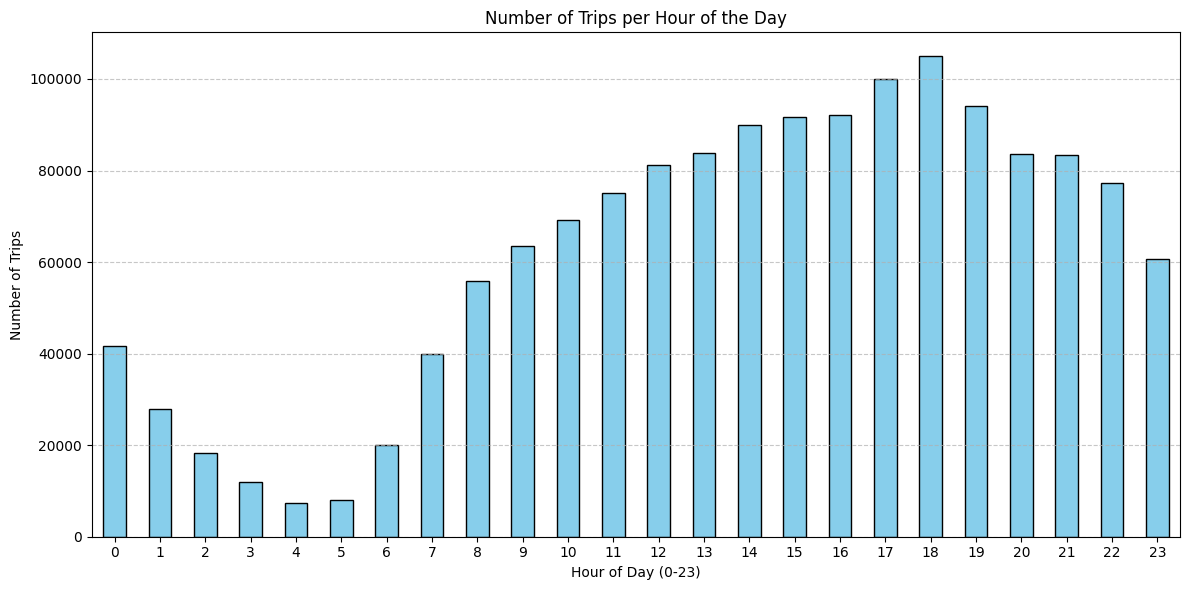

Busiest hour of the day is 18:00 with 104,947 trips.


In [89]:


sampled_data['pickup_hour'] = sampled_data['tpep_pickup_datetime'].dt.hour


hourly_trip_counts = sampled_data['pickup_hour'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
hourly_trip_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Trips per Hour of the Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


busiest_hour = hourly_trip_counts.idxmax()
trip_count = hourly_trip_counts.max()

print(f"Busiest hour of the day is {busiest_hour}:00 with {trip_count:,} trips.")

Let us now Scale Up the values to find the actual number of trips.

We must remember that we took 5% of the values, so the scale up fraction will be 0.05

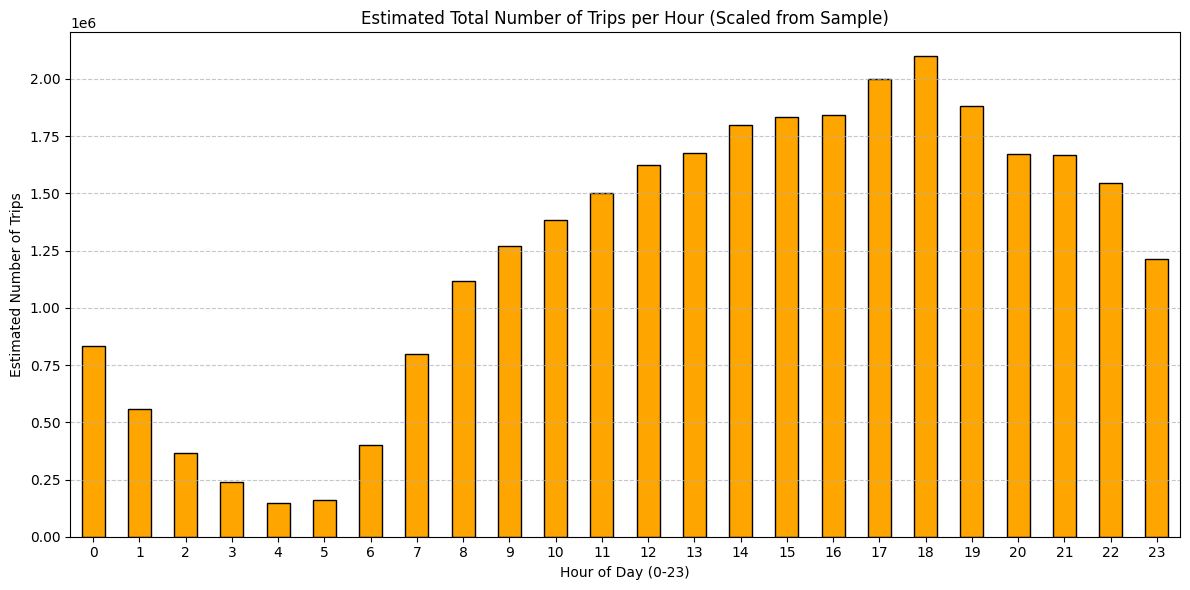

Estimated busiest hour is 18:00 with ~2,098,940 trips.


In [90]:

sample_fraction = 0.05


hourly_trip_counts_sampled = sampled_data['pickup_hour'].value_counts().sort_index()


hourly_trip_counts_scaled = (hourly_trip_counts_sampled / sample_fraction).astype(int)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
hourly_trip_counts_scaled.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Estimated Total Number of Trips per Hour (Scaled from Sample)')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Estimated Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


busiest_hour = hourly_trip_counts_scaled.idxmax()
trip_count = hourly_trip_counts_scaled.max()

print(f"Estimated busiest hour is {busiest_hour}:00 with ~{trip_count:,} trips.")

Let us now compare Traffic Trends from Weekdays and Weekends

Let us first define Weekends.

In [91]:
sampled_data['is_weekend'] = sampled_data['pickup_day'].apply(lambda x: 1 if x in [5, 6] else 0)

Now let us calculate the average metrics of weekdays vs. weekends

In [92]:
summary = sampled_data.groupby('is_weekend').agg({
    'trip_duration': 'mean',
    'trip_distance': 'mean',
    'avg_speed': 'mean',
    'passenger_count': 'mean',
    'fare_amount': 'mean',
    'congestion_surcharge': 'mean',
    'VendorID': 'count'
}).rename(columns={'VendorID': 'trip_count'})

print(summary)

            trip_duration  trip_distance  avg_speed  passenger_count  \
is_weekend                                                             
0                   17.56           3.46      11.91             1.34   
1                   16.51           3.61      13.40             1.45   

            fare_amount  congestion_surcharge  trip_count  
is_weekend                                                 
0                 19.55                  2.32     1083754  
1                 19.44                  2.32      398220  


Now we will visualize these Metrics

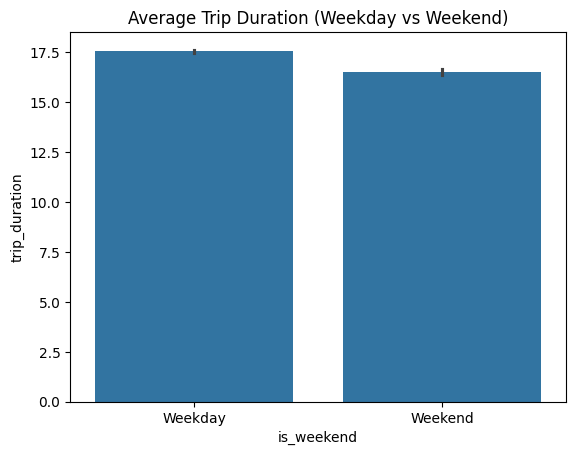

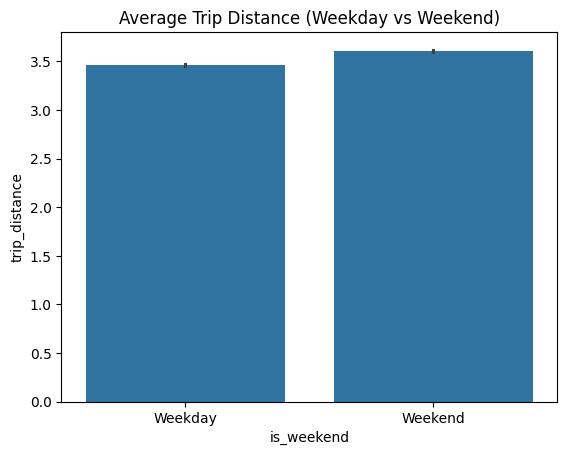

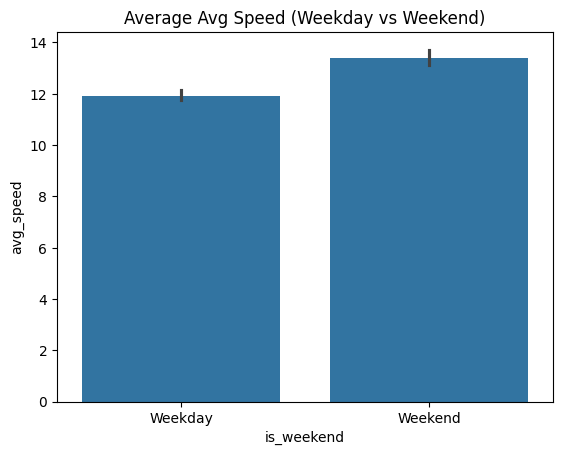

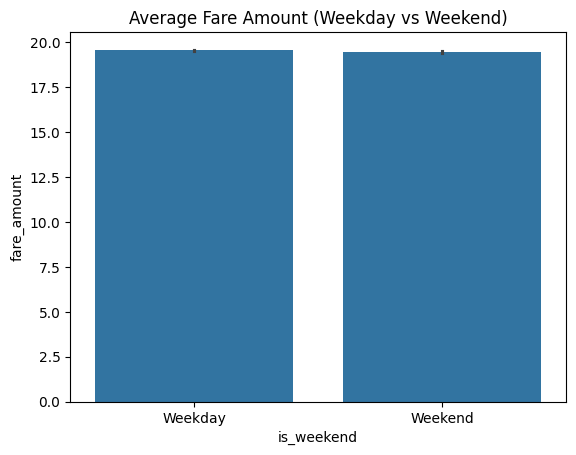

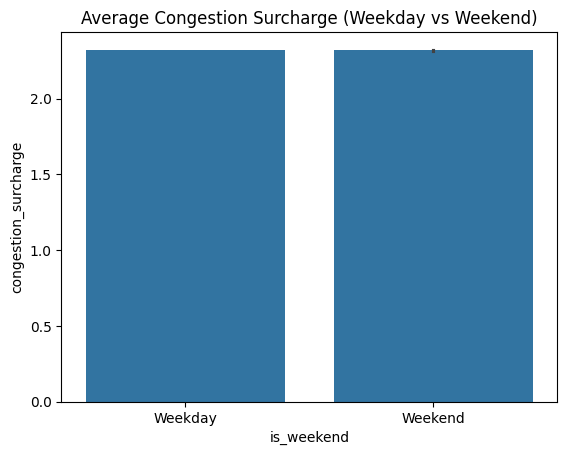

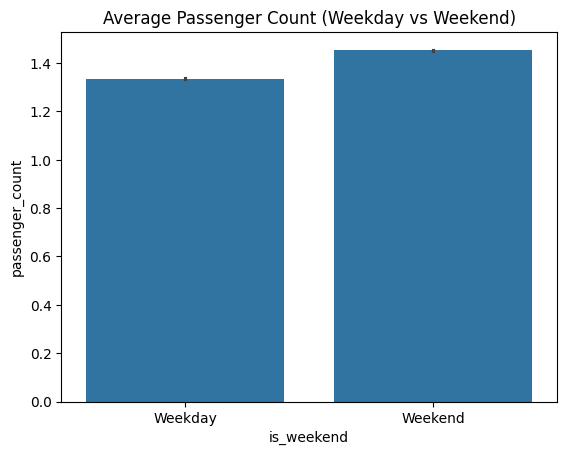

In [93]:
metrics = ['trip_duration', 'trip_distance', 'avg_speed', 'fare_amount', 'congestion_surcharge', 'passenger_count']

for metric in metrics:

    sns.barplot(x='is_weekend', y=metric, data=sampled_data)
    plt.title(f'Average {metric.replace("_", " ").title()} (Weekday vs Weekend)')
    plt.xticks([0,1], ['Weekday', 'Weekend'])
    plt.show()

Common inferences:

i. Trip duration is higher during the week than weekends

ii. Trip distance however is higher during weekends.

iii. Average Speed is higher during weekends due to reduced traffic congestion

iv. Average Fare amount is only marginally lower during weekdays

v. Congestion Surcharge sees almost no change

vi. Average Passenger count during weekends is higher.

Let us now find the top 10 Pick-up Zones


In [96]:
top_pickups = sampled_data['PULocationID'].value_counts().head(10).reset_index()
top_pickups.columns = ['LocationID', 'trip_count']

top_pickups.rename(columns={'LocationID': 'PULocationID'}, inplace=True)

top_pickups_named = top_pickups.merge(zones, on='PULocationID', how='left')

print(top_pickups_named[['PULocationID', 'zone', 'trip_count']])

   PULocationID                          zone  trip_count
0           132                   JFK Airport       79370
1           237         Upper East Side South       69689
2           161                Midtown Center       69681
3           236         Upper East Side North       62175
4           162                  Midtown East       53103
5           138             LaGuardia Airport       52391
6           186  Penn Station/Madison Sq West       51879
7           230     Times Sq/Theatre District       49710
8           142           Lincoln Square East       49046
9           170                   Murray Hill       44427


Let us now find the top drop Zones

In [101]:
top_dropoffs = sampled_data['DOLocationID'].value_counts().head(10).reset_index()
top_dropoffs.columns = ['LocationID', 'trip_count']

top_dropoffs_named = top_dropoffs.merge(zones, left_on='LocationID', right_on='PULocationID', how='left')

print(top_dropoffs_named[['LocationID', 'zone','trip_count']])

   LocationID                       zone  trip_count
0         236      Upper East Side North       65286
1         237      Upper East Side South       62265
2         161             Midtown Center       58081
3         230  Times Sq/Theatre District       45841
4         170                Murray Hill       44319
5         162               Midtown East       42139
6         142        Lincoln Square East       41640
7         239      Upper West Side South       41379
8         141            Lenox Hill West       39471
9          68               East Chelsea       37494


Let us find the the Top 10 and Bottom 10 Pick-up Drop-Off Ratios

In [102]:

pickup_counts = df['PULocationID'].value_counts().rename('pickups')
dropoff_counts = df['DOLocationID'].value_counts().rename('dropoffs')

zone_counts = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

zone_counts['dropoffs_safe'] = zone_counts['dropoffs'].replace(0, 1)

zone_counts['pickup_dropoff_ratio'] = zone_counts['pickups'] / zone_counts['dropoffs_safe']

top_10 = zone_counts.sort_values('pickup_dropoff_ratio', ascending=False).head(10)

bottom_10 = zone_counts.sort_values('pickup_dropoff_ratio').head(10)

print("Top 10 Pickup/Dropoff Ratios (More pickups relative to dropoffs):")
print(top_10[['pickups', 'dropoffs', 'pickup_dropoff_ratio']])

print("\nBottom 10 Pickup/Dropoff Ratios (More dropoffs relative to pickups):")
print(bottom_10[['pickups', 'dropoffs', 'pickup_dropoff_ratio']])

NameError: name 'df' is not defined

Let us identify Zones with high pick-up and drop off at Nights (between 11 PM and 5 AM)

Let us filter out Night Hours

In [ ]:
night_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

Let us find top 10 pickup and drop off zones at night

In [ ]:
night_pickups = night_df['PULocationID'].value_counts().head(10).reset_index()
night_pickups.columns = ['LocationID', 'pickup_count']
night_dropoffs = night_df['DOLocationID'].value_counts().head(10).reset_index()
night_dropoffs.columns = ['LocationID', 'dropoff_count']

Lets add the names to our Top 10 Pick Up and Drop off Zones from 119

In [ ]:

night_pickups.rename(columns={'LocationID': 'PULocationID'}, inplace=True)
night_dropoffs.rename(columns={'LocationID': 'PULocationID'}, inplace=True)

night_pickups_named = night_pickups.merge(zones, on='PULocationID', how='left')
night_dropoffs_named = night_dropoffs.merge(zones, on='PULocationID', how='left')


print("Top 10 Nighttime Pickup Zones:")

print(night_pickups_named[['PULocationID', 'zone', 'borough', 'pickup_count']])

print("\nTop 10 Nighttime Dropoff Zones:")

print(night_dropoffs_named[['PULocationID', 'zone', 'borough', 'dropoff_count']])

Let us try and visualize the same

In [ ]:
sns.barplot(x='pickup_count', y='zone', data=night_pickups_named)
plt.title('Top 10 Pickup Zones (11PM–5AM)')
plt.xlabel('Number of Pickups')
plt.ylabel('Zone')
plt.show()

sns.barplot(x='dropoff_count', y='zone', data=night_dropoffs_named)
plt.title('Top 10 Dropoff Zones (11PM–5AM)')
plt.xlabel('Number of Dropoffs')
plt.ylabel('Zone')
plt.show()

Let us find out the revenue share for day and night

Let us first differentiate between night and day i.e., Day 5AM to 11 PM and Night 11 PM to 5 AM

In [106]:
night_df = sampled_data[(sampled_data['pickup_hour'] >= 23) | (sampled_data['pickup_hour'] <= 5)]

day_df = sampled_data[(sampled_data['pickup_hour'] > 5) & (sampled_data['pickup_hour'] < 23)]

Now we will calculate the revenue for night and day separately

In [107]:
night_revenue = night_df['total_amount'].sum()
day_revenue = day_df['total_amount'].sum()
total_revenue = night_revenue + day_revenue

Here we will print the shares

In [108]:
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share (11 PM–5 AM): {night_share:.2f}%")
print(f"Daytime Revenue Share (5 AM–11 PM): {day_share:.2f}%")

Nighttime Revenue Share (11 PM–5 AM): 12.17%
Daytime Revenue Share (5 AM–11 PM): 87.83%


We will now visualize the same with a pie chart.

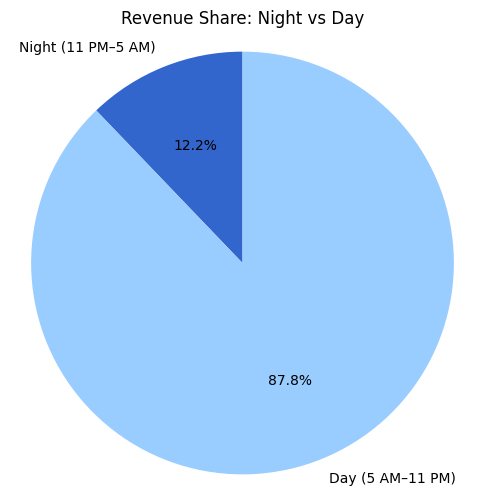

In [109]:
labels = ['Night (11 PM–5 AM)', 'Day (5 AM–11 PM)']
sizes = [night_share, day_share]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#3366cc','#99ccff'])
plt.title('Revenue Share: Night vs Day')
plt.axis('equal')
plt.show()

Now let us move on to pricing strategy

Analyse the fare per mile per passenger for different passenger counts.

For this we will first clean the data to remove trip_distance = 0 and Passenger count =0


In [111]:
df_clean = sampled_data[(sampled_data['trip_distance'] > 0) & (sampled_data['passenger_count'] > 0)].copy()

Now we will calculate Fare per Mile Per Passenger

In [112]:
df_clean['fare_per_mile_per_passenger'] = df_clean['fare_amount'] / (df_clean['trip_distance'] * df_clean['passenger_count'])

Let us now group the data to get the Summary Stats

In [113]:
grouped = df_clean.groupby('passenger_count')['fare_per_mile_per_passenger'].agg(['mean', 'median', 'count']).reset_index()

print(grouped.sort_values('passenger_count'))

   passenger_count  mean  median    count
0             1.00 10.67    7.12  1115386
1             2.00  6.19    3.46   224012
2             3.00  3.71    2.35    55439
3             4.00  3.97    1.74    29816
4             5.00  1.71    1.41    19630
5             6.00  1.32    1.19    13234


Let us visualize the same

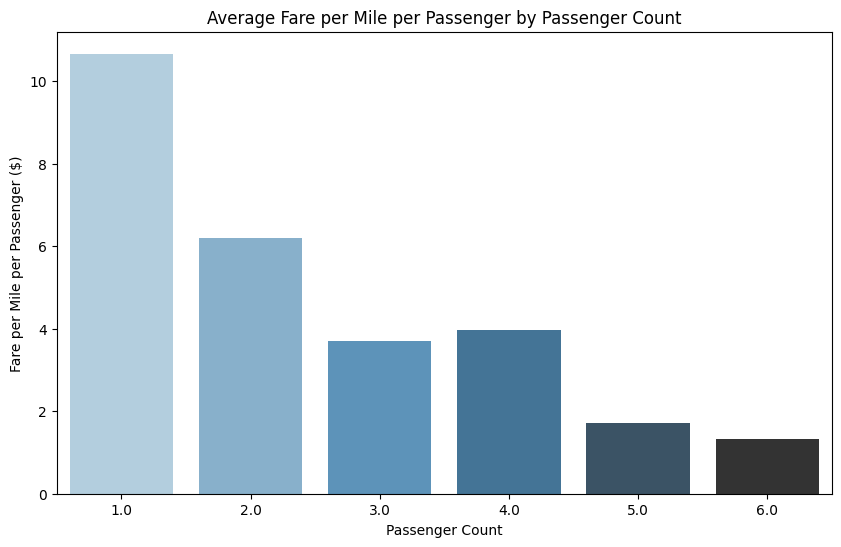

In [114]:

plt.figure(figsize=(10,6))
sns.barplot(x='passenger_count', y='mean', hue='passenger_count', data=grouped, palette='Blues_d', legend=False)
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger ($)')
plt.show()

Analyse the average fare per mile for the different vendors for different hours of the day.


For this lets again clean the data just to be sure

In [116]:
df_vendor = sampled_data[(sampled_data['trip_distance'] > 0) & (sampled_data['fare_amount'] > 0)].copy()

Lets calculate the fare per mile


In [117]:
df_vendor['fare_per_mile'] = df_vendor['fare_amount'] / df_vendor['trip_distance']

lets group the vendor and summarize the data

In [118]:
vendor_fares = df_vendor.groupby('VendorID')['fare_per_mile'].agg(['mean', 'median', 'count']).reset_index()

print(vendor_fares)

   VendorID  mean  median    count
0         1  8.01    7.13   393276
1         2 12.03    7.08  1088697


Let us visualize the same

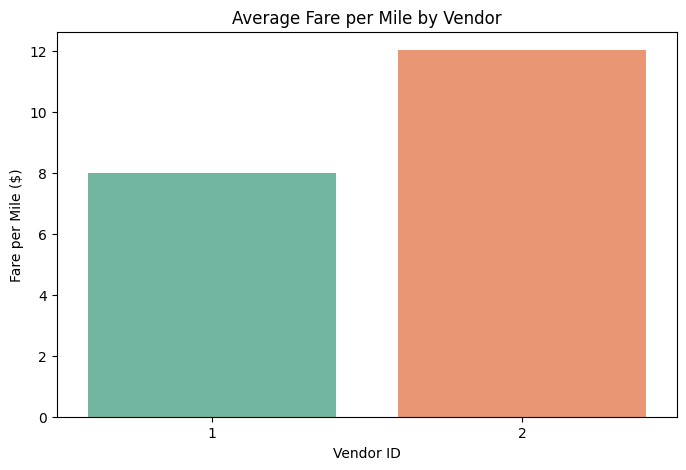

In [119]:
plt.figure(figsize=(8, 5))
sns.barplot(x='VendorID', y='mean', hue='VendorID', data=vendor_fares, palette='Set2', legend=False)
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.show()

Let us now define Distance Tiers and add the column

In [122]:
def distance_tier(dist):
    if dist <= 1:
        return 'Very Short'
    elif dist <= 3:
        return 'Short'
    elif dist <= 7:
        return 'Medium'
    elif dist <= 15:
        return 'Long'
    else:
        return 'Very Long'

sampled_data['distance_tier'] = sampled_data['trip_distance'].apply(distance_tier)

Customer Experience and Other Factors

Analyze tip percentages based on distances, passenger counts and pickup times

Let us first calculate the Tip as a percentage of fare

In [124]:
df_tip = sampled_data[(sampled_data['fare_amount'] > 0) & (sampled_data['tip_amount'] >= 0)].copy()
df_tip['tip_percent'] = (df_tip['tip_amount'] / df_tip['fare_amount']) * 100

Let us bin Tip Percentage against the Trip Distance

In [125]:
bins = [0, 1, 3, 7, 15, df_tip['trip_distance'].max()]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
df_tip['distance_tier'] = pd.cut(df_tip['trip_distance'], bins=bins, labels=labels)

distance_tips = df_tip.groupby('distance_tier')['tip_percent'].agg(['mean', 'median', 'count']).reset_index()
print(distance_tips)

  distance_tier  mean  median   count
0    Very Short 24.13   29.07  329702
1         Short 20.61   25.17  725245
2        Medium 17.36   22.77  230819
3          Long 20.63   22.11  118332
4     Very Long 14.96   20.51   77875


<ipython-input-125-c8fdb5ac25fb>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_tips = df_tip.groupby('distance_tier')['tip_percent'].agg(['mean', 'median', 'count']).reset_index()


Let us plot the same to get a clear picture

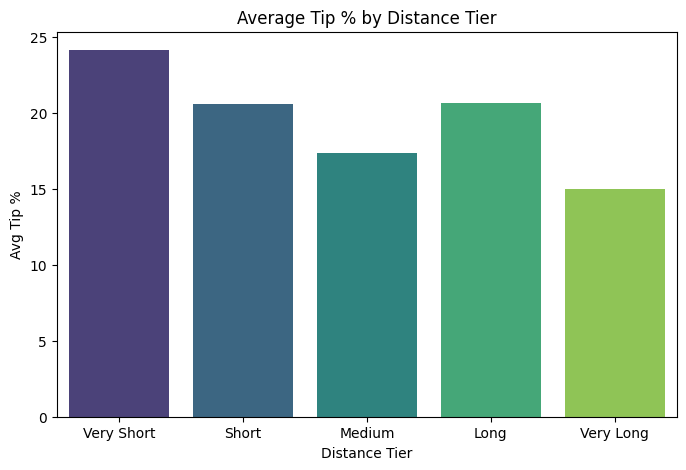

In [126]:
plt.figure(figsize=(8, 5))
sns.barplot(x='distance_tier', y='mean', hue='distance_tier', data=distance_tips, palette='viridis', legend=False)
plt.title('Average Tip % by Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Avg Tip %')
plt.show()

Let us now Compare Trips with Tip%<10% vs Tip%>25%

let us first filter out the two rows exclusively

In [129]:
df_tip_filtered = sampled_data[(sampled_data['fare_amount'] > 0) & (sampled_data['tip_amount'] >= 0)].copy()
df_tip_filtered['tip_percent'] = (df_tip_filtered['tip_amount'] / df_tip_filtered['fare_amount']) * 100

Now we define a Low Tip (<10%) and a High Tip (>10%)

In [130]:
low_tip = df_tip_filtered[df_tip_filtered['tip_percent'] < 10]
high_tip = df_tip_filtered[df_tip_filtered['tip_percent'] > 25]

Now we compare the Vital Stats of these two Groups

In [132]:
sampled_data['tpep_pickup_datetime'] = pd.to_datetime(sampled_data['tpep_pickup_datetime'])
sampled_data['tpep_dropoff_datetime'] = pd.to_datetime(sampled_data['tpep_dropoff_datetime'])

sampled_data['trip_duration'] = (sampled_data['tpep_dropoff_datetime'] - sampled_data['tpep_pickup_datetime']).dt.total_seconds() / 60

In [133]:
comparison = {
    'trip_distance_mean': [low_tip['trip_distance'].mean(), high_tip['trip_distance'].mean()],
    'fare_amount_mean': [low_tip['fare_amount'].mean(), high_tip['fare_amount'].mean()],
    'pickup_hour_mean': [low_tip['pickup_hour'].mean(), high_tip['pickup_hour'].mean()],
    'passenger_count_mode': [low_tip['passenger_count'].mode()[0], high_tip['passenger_count'].mode()[0]],
    'payment_type_mode': [low_tip['payment_type'].mode()[0], high_tip['payment_type'].mode()[0]],
    'trip_duration_mean': [low_tip['trip_duration'].mean(), high_tip['trip_duration'].mean()]
}

comparison_df = pd.DataFrame(comparison, index=['Tip < 10%', 'Tip > 25%'])
print(comparison_df)

           trip_distance_mean  fare_amount_mean  pickup_hour_mean  \
Tip < 10%                3.92             21.35             13.92   
Tip > 25%                2.30             14.33             14.60   

           passenger_count_mode  payment_type_mode  trip_duration_mean  
Tip < 10%                  1.00                  2               19.80  
Tip > 25%                  1.00                  1               12.61  


Analyse the variation of passenger count across hours and days of the week.

See how passenger count varies across hours and days

Lets ensure the date and time columns are properly named

In [135]:
sampled_data['tpep_pickup_datetime'] = pd.to_datetime(sampled_data['tpep_pickup_datetime'])
sampled_data['pickup_hour'] = sampled_data['tpep_pickup_datetime'].dt.hour
sampled_data['pickup_day'] = sampled_data['tpep_pickup_datetime'].dt.day_name()

Let us aggregate average Passenger Count by Hour and Day

In [136]:
hourly_passengers = sampled_data.groupby('pickup_hour')['passenger_count'].mean().reset_index()

daily_passengers = sampled_data.groupby('pickup_day')['passenger_count'].mean().reset_index()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_passengers['pickup_day'] = pd.Categorical(daily_passengers['pickup_day'], categories=days_order, ordered=True)
daily_passengers = daily_passengers.sort_values('pickup_day')

Now, let us visualize the same

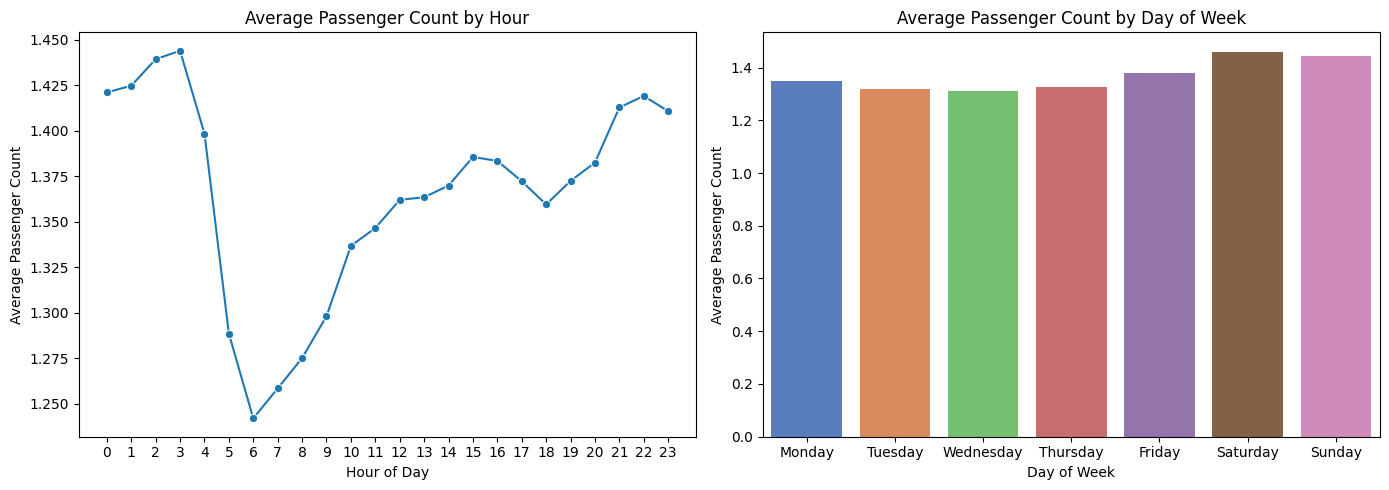

In [137]:

plt.figure(figsize=(14,5))


plt.subplot(1, 2, 1)
sns.lineplot(data=hourly_passengers, x='pickup_hour', y='passenger_count', marker='o')
plt.title('Average Passenger Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0,24))


plt.subplot(1, 2, 2)
sns.barplot(data=daily_passengers, x='pickup_day', y='passenger_count',
            palette='muted', hue='pickup_day', legend=False)
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Passenger Count')

plt.tight_layout()
plt.show()


Let us now see how passnger count varies across Zones

First let us calculate average passenger count by Pick up and Drop off Zones and group them

In [139]:
pickup_passenger_avg = sampled_data.groupby('PULocationID')['passenger_count'].mean().reset_index()

dropoff_passenger_avg = sampled_data.groupby('DOLocationID')['passenger_count'].mean().reset_index()

Let us now print the Top 10 Pickup and Drop Off Zones based on Average Passenger Count

In [140]:
print("Top 10 Pickup Location IDs by Avg Passenger Count")
print(pickup_passenger_avg.sort_values('passenger_count', ascending=False).head(10))

print("\nTop 10 Dropoff Location IDs by Avg Passenger Count")
print(dropoff_passenger_avg.sort_values('passenger_count', ascending=False).head(10))

Top 10 Pickup Location IDs by Avg Passenger Count
     PULocationID  passenger_count
5               6             1.95
185           195             1.83
11             12             1.72
169           178             1.71
56             58             1.67
184           194             1.65
64             66             1.61
91             93             1.55
197           207             1.55
32             34             1.53

Top 10 Dropoff Location IDs by Avg Passenger Count
     DOLocationID  passenger_count
110           115             1.87
11             12             1.81
182           187             1.80
200           206             1.73
0               1             1.65
208           214             1.63
26             27             1.62
63             64             1.59
127           132             1.58
57             58             1.56


Let us Visualize it

Top 10 Pickup Location IDs by Avg Passenger Count
     PULocationID  passenger_count
5               6             1.95
185           195             1.83
11             12             1.72
169           178             1.71
56             58             1.67
184           194             1.65
64             66             1.61
91             93             1.55
197           207             1.55
32             34             1.53

Top 10 Dropoff Location IDs by Avg Passenger Count
     DOLocationID  passenger_count
110           115             1.87
11             12             1.81
182           187             1.80
200           206             1.73
0               1             1.65
208           214             1.63
26             27             1.62
63             64             1.59
127           132             1.58
57             58             1.56


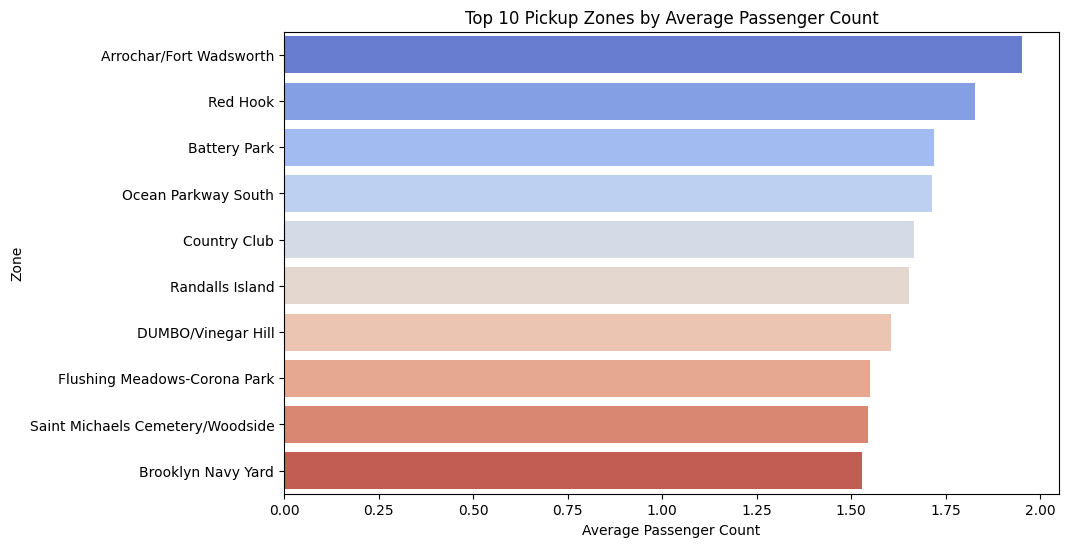

In [146]:
pickup_passenger_avg = sampled_data.groupby('PULocationID')['passenger_count'].mean().reset_index()

dropoff_passenger_avg = sampled_data.groupby('DOLocationID')['passenger_count'].mean().reset_index()
print("Top 10 Pickup Location IDs by Avg Passenger Count")

top_pickup = pickup_passenger_avg.sort_values('passenger_count', ascending=False).head(10)
print(top_pickup)

print("\nTop 10 Dropoff Location IDs by Avg Passenger Count")
print(dropoff_passenger_avg.sort_values('passenger_count', ascending=False).head(10))

top_pickup_named = top_pickup.merge(zones[['PULocationID', 'zone']], on='PULocationID', how='left')
plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='zone', data=top_pickup_named, palette='coolwarm', hue='zone', legend=False)
plt.title('Top 10 Pickup Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Zone')
plt.show()

Let us find out the surcharge frequency as a percentage

In [144]:
congestion_percent = sampled_data['congestion_surcharge'].value_counts(normalize=True).sort_index() * 100
print("Congestion Surcharge Percentage:\n", congestion_percent.round(2))

airport_fee_percent = sampled_data['Airport_fee'].value_counts(normalize=True).sort_index() * 100
print("\nAirport Fee Percentage:\n", airport_fee_percent.round(2))

Congestion Surcharge Percentage:
 congestion_surcharge
0.00    7.17
2.50   92.83
Name: proportion, dtype: float64

Airport Fee Percentage:
 Airport_fee
0.00   92.00
1.00    0.00
1.25    1.78
1.75    6.21
Name: proportion, dtype: float64


Final Conclusions

In [149]:
sampled_data.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,total_amount,congestion_surcharge,pickup_date,pickup_hour,Airport_fee,trip_duration,trip_duration_hours,avg_speed,hour,is_weekend
count,1481974.00,1481974,1481974,1481974.00,1481974.00,1481974.00,1481974.00,1481974.00,1481974.00,1481973.00,...,1481973.00,1481974.00,1481973,1481974.00,1481974.00,1481974.00,1481974.00,1481974.00,1481974.00,1481974.00
mean,1.73,2023-05-29 21:39:02.127536128,2023-05-29 21:56:18.788488192,1.37,3.50,1.54,165.35,164.08,1.20,19.52,...,28.64,2.32,2023-05-29 06:51:19.484444416,14.29,0.13,17.28,0.29,12.31,14.29,0.27
min,1.00,2022-12-31 23:51:30,2022-12-31 23:56:06,0.00,0.01,1.00,1.00,1.00,1.00,0.01,...,1.01,0.00,2022-12-31 00:00:00,0.00,0.00,0.02,0.00,0.00,0.00,0.00
25%,1.00,2023-03-16 23:55:12.249999872,2023-03-17 00:10:16.500000,1.00,1.10,1.00,132.00,113.00,1.00,9.30,...,15.96,2.50,2023-03-16 00:00:00,11.00,0.00,7.65,0.13,7.32,11.00,0.00
50%,2.00,2023-05-25 15:30:33.500000,2023-05-25 15:54:32,1.00,1.80,1.00,162.00,162.00,1.00,13.50,...,21.00,2.50,2023-05-25 00:00:00,15.00,0.00,12.48,0.21,9.80,15.00,0.00
75%,2.00,2023-08-11 10:29:46.249999872,2023-08-11 10:46:40.750000128,1.00,3.43,1.00,234.00,234.00,1.00,21.90,...,30.50,2.50,2023-08-11 00:00:00,19.00,0.00,20.30,0.34,13.54,19.00,1.00
max,2.00,2023-10-29 04:59:24,2023-10-29 23:06:13,6.00,104.30,99.00,265.00,265.00,4.00,199.70,...,300.95,2.50,2023-10-29 00:00:00,23.00,1.75,5522.43,92.04,54360.00,23.00,1.00
std,0.44,NaN,NaN,0.89,4.49,6.81,63.62,69.78,0.45,17.31,...,21.98,0.65,NaN,5.79,0.45,41.43,0.69,99.03,5.79,0.44


**After all our workings on the Data, we are left with 1481974 Rows, the following are the conclusions we can draw from our Analysis:**

**1. Final Insights and Recommendations**

Based on the analysis of over 1.48 million NYC taxi trip records, several patterns and insights have emerged. These offer clear guidelines for improving both customer satisfaction and fleet efficiency.

Key insights include:

Peak demand is observed between 3 PM to 8 PM, especially on Fridays and weekends.

High trip density zones include Manhattan and areas near JFK and LaGuardia airports.

Average speed is 12 mph, but this varies significantly during peak hours, indicating congestion-prone periods.

Weekend demand surges despite similar average trip distances.

**2. Recommendations to Optimize Routing and Dispatching**

**Dynamic Routing:**

Use real-time GPS and traffic data to reroute cabs during peak hours. Avoid highly congested corridors, especially during 5–7 PM on weekdays.

**Predictive Dispatching:**

Implement ML models to predict demand spikes based on historic pickup times and weather forecasts, especially around Friday evenings and Saturday afternoons.

**Idle Cab Reduction:**

Analyze zones with frequent long idle durations and reassign these taxis to nearby high-demand areas in real-time using fleet heatmaps.

**Shift-Based Optimization:**

Assign more drivers during peak hours (3–9 PM), reducing unnecessary supply during the early morning off-peak times (12–6 AM).

**Short Trip Pooling:**

Enable pooling or batch assignments in downtown areas with short trip distances to optimize routing and reduce wait time.

**3. Strategic Cab Positioning by Zones**

**High-Demand Clusters:**

Continuously position taxis around zones with recurring high pickups, particularly:

i. Midtown Manhattan (e.g., PULocationID 161–237)

ii. Airport zones (IDs near JFK: 132, 138; LaGuardia: 90, 138)

**Weekend Zoning:**
On weekends, allocate more taxis to entertainment districts and major event venues where leisure trips spike.

**Time-Based Zonal Shifts:**

i. Mornings (7–10 AM): Focus on residential to business zones.

ii. Evenings (5–8 PM): Reverse flow—business to home or leisure.

**Real-Time Zonal Rebalancing:**

Use trip drop-off data to rebalance cab positions proactively, preventing over-concentration in low-demand areas.

**Coverage in Underserved Zones:**

Identify zones with low cab availability but frequent trip requests and incentivize drivers to station there during gaps.

**4. Data-Driven Pricing Strategy Adjustments**

**Surge Pricing Calibration:**

Instead of blanket surge pricing, apply micro-surges in highly congested zones only during validated high-demand periods (e.g., Fridays 5–9 PM, Sundays 2–6 PM).

**Distance-Based Fare Smoothing:**

Introduce tiered pricing for short-distance (<2 miles) vs long-distance (>8 miles) trips to attract more short-trip customers during low demand.

**Time-of-Day Differentiation:**

Offer discounted rates or flat fare promotions during early mornings (12 AM–6 AM) to increase ride volume during slack periods.

**Competitor Benchmarking:**

Regularly compare fare trends with rideshare platforms (Uber, Lyft). Maintain 5–8% lower rates in overlapping zones during non-peak hours to gain market share.

**Loyalty and Subscription Models:**

Use trip frequency data to offer ride passes or subscription discounts for regular commuters (especially during weekdays).

